In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib as plot
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import pyogrio


 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
ocm_df = pd.read_csv('/Users/songderi/Desktop/dissertation project/data/ocmGB.csv')
ncpr_df = pd.read_csv('/Users/songderi/Desktop/dissertation project/data/national-charge-point-registry.csv')

/var/folders/2b/85jx_gt935s7lkvfnnypcysr0000gn/T/ipykernel_6551/1945061741.py:2: DtypeWarning: Columns (5,10,11,16,17,18,51,54,56,57,58,59,60,61,62,63,64,65,90,101,112,115,119,122,123,126,130,133,134,137,141,144,148,152,155) have mixed types. Specify dtype option on import or set low_memory=False.
  ncpr_df = pd.read_csv('/Users/songderi/Desktop/dissertation project/data/national-charge-point-registry.csv')


In [3]:
ocm_df.head()
ncpr_df.head()

ID                                  UUID  \
0  193329  DB315699-AB98-4462-98B0-64D6A8CAFB78   
1  193327  4C07BE77-1CDC-45B1-8022-C4BCDEBE70F3   
2  193325  DDE4EE43-3AC7-47D4-AC33-4CB0080B5E95   
3  193316  8E9BC057-43F4-47DA-8342-D5C68D4EA028   
4  193315  75769D83-E8D8-4D0C-B863-10BF6F85731C   

                      LocationTitle          AddressLine1 AddressLine2  \
0            Faulkner Road Car Park         Faulkner Road          NaN   
1  James Street Car Park, Blaenavon          James Street          NaN   
2              High Street Car Park           High Street          NaN   
3                     Colliers' Row         Colliers' Row          NaN   
4                         Xcel Bowl  Old Llansteffan Road          NaN   

         Town StateOrProvince Postcode         Country   Latitude  ...  \
0     Newport           Wales     NP20  United Kingdom  51.588719  ...   
1   Blaenavon           Wales  NP4 9EH  United Kingdom  51.772424  ...   
2      Blaina           Wales     NP23  United Kingdom  51.767528  ...   
3   Ebbw Vale           Wales     NP23  United Kingdom  51.782460  ...   
4  Carmarthen           Wales     SA31  United Kingdom  51.848680  ...   

   Addr_RelatedURL                               ConnectionType  ChargerType  \
0              NaN  Type 2 (Socket Only); Type 2 (Socket Only);          NaN   
1              NaN  Type 2 (Socket Only); Type 2 (Socket Only);          NaN   
2              NaN  Type 2 (Socket Only); Type 2 (Socket Only);          NaN   
3              NaN  Type 2 (Socket Only); Type 2 (Socket Only);          NaN   
4              NaN                        Type 2 (Socket Only);          NaN   

                  UsageType NumberOfPoints GeneralComments DateLastConfirmed  \
0  Public - Pay At Location            4.0             NaN               NaN   
1  Public - Pay At Location            4.0    Scan QR code               NaN   
2  Public - Pay At Location            4.0             NaN               NaN   
3  Public - Pay At Location            4.0             NaN               NaN   
4  Public - Pay At Location            2.0    Scan QR Code               NaN   

                   StatusType   DateLastStatusUpdate            DateCreated  
0                 Operational    6/1/2022 7:34:00 AM    6/1/2022 7:34:00 AM  
1                 Operational    6/1/2022 7:25:00 AM    6/1/2022 7:25:00 AM  
2                 Operational  5/31/2022 10:29:00 PM  5/31/2022 10:29:00 PM  
3  Partly Operational (Mixed)   5/30/2022 8:35:00 PM   5/30/2022 8:29:00 PM  
4                 Operational   5/30/2022 8:25:00 PM   5/30/2022 8:25:00 PM  

[5 rows x 28 columns]

chargeDeviceID reference  \
0  9c8661befae6dbcd08304dbf4dcaf0db      SC22   
1  52b738b303d90a884137546353e09ebb      SC23   
2  b58ac8403eb9cf17fae1dcd16df71fde      SC33   
3  fd8c07a31f8a85910ad8476f5f7efb27      SC03   
4  f507783927f2ec2737ba40afbd17efb5      SC19   

                                       name   latitude  longitude  \
0    Little Victoria St Car Park - Socket 2  54.592703  -5.933430   
1  Little Donegall Street, Belfast (Socket   54.604646  -5.931866   
2         Cromac Street Car Park (Socket 2)  54.594109  -5.924292   
3  Hope Street Car Park, Belfast (Socket 2)  54.593365  -5.935574   
4       Adelaide Street, Belfast (Socket 2)  54.594342  -5.928256   

  subBuildingName                buildingName buildingNumber  \
0             NaN  DRD Roads Service Car Park              4   
1             NaN                         NaN            128   
2             NaN                         NaN          89-97   
3             NaN                         NaN            205   
4             NaN                         NaN          23-91   

             thoroughfare        street  ... connector8Type  \
0         Downshire Place           NaN  ...            NaN   
1  Little Donegall Street           NaN  ...            NaN   
2           Cromac Street           NaN  ...            NaN   
3               Sandy Row  Bruce Street  ...            NaN   
4         Adelaide Street           NaN  ...            NaN   

  connector8RatedOutputKW connector8OutputCurrent connector8RatedVoltage  \
0                     NaN                     NaN                    NaN   
1                     NaN                     NaN                    NaN   
2                     NaN                     NaN                    NaN   
3                     NaN                     NaN                    NaN   
4                     NaN                     NaN                    NaN   

  connector8ChargeMethod connector8ChargeMode connector8TetheredCable  \
0                    NaN                  NaN                     NaN   
1                    NaN                  NaN                     NaN   
2                    NaN                  NaN                     NaN   
3                    NaN                  NaN                     NaN   
4                    NaN                  NaN                     NaN   

  connector8Status connector8Description connector8Validated  
0              NaN                   NaN                 NaN  
1              NaN                   NaN                 NaN  
2              NaN                   NaN                 NaN  
3              NaN                   NaN                 NaN  
4              NaN                   NaN                 NaN  

[5 rows x 158 columns]

In [4]:
ocm_df.info()
ncpr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12577 entries, 0 to 12576
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      12577 non-null  int64  
 1   UUID                    12577 non-null  object 
 2    LocationTitle          12568 non-null  object 
 3   AddressLine1            12309 non-null  object 
 4   AddressLine2            2450 non-null   object 
 5   Town                    12242 non-null  object 
 6   StateOrProvince         5210 non-null   object 
 7   Postcode                12540 non-null  object 
 8   Country                 12577 non-null  object 
 9   Latitude                12577 non-null  float64
 10  Longitude               12577 non-null  float64
 11  Distance                0 non-null      float64
 12  DistanceUnit            12577 non-null  int64  
 13  Addr_ContactTelephone1  2032 non-null   object 
 14  Addr_ContactTelephone2  80 non-null   

# Exploratory Data Analysis

### 1. Stations Per County

In [5]:
#check whether null
ncpr_df.county.isnull

<bound method Series.isnull of 0        County Antrim
1        County Antrim
2        County Antrim
3        County Antrim
4        County Antrim
             ...      
22803           Dorset
22804           Dorset
22805          Gwynedd
22806        Yorkshire
22807        Yorkshire
Name: county, Length: 22808, dtype: object>

In [6]:
ncpr_df.county.unique()

array(['County Antrim', 'County Armagh', 'County Tyrone', 'County Down',
       'County Londonderry', 'County Fermanagh', 'Midlothian',
       'Greater London', 'Cheshire', 'Tyne and Wear', 'Warwickshire',
       'Somerset', 'Lancashire', 'Gwent', 'Na h-Eileanan Siar', 'Surrey',
       'Essex', 'Berkshire', 'Wiltshire', 'Devon', 'West Yorkshire',
       'South Yorkshire', 'Kent', 'Northumberland', 'Staffordshire',
       'Hertfordshire', 'City of Bristol', 'Orkney Islands',
       'County Durham', 'Gloucestershire', 'Greater Manchester',
       'North Yorkshire', 'Cambridgeshire', 'City of Cardiff',
       'Hampshire', 'Oxfordshire', 'Dorset', 'West Sussex',
       'Buckinghamshire', 'Northamptonshire', 'Newtownabbey', 'Rutland',
       'City of Leicester', 'Lincolnshire', 'West Midlands',
       'City of Coventry', 'Derbyshire', 'Worcestershire',
       'City of Nottingham', 'North East Lincolnshire', 'Leicestershire',
       'Nottinghamshire', 'Shropshire', 'Herefordshire',
       'N

Some London Boroughs are considered as counties here, check to make sure whether to add them up to greater Londond county or they are just duplicated and get rid of them.

/Users/songderi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'Greater London'),
 Text(1, 0, 'Wiltshire'),
 Text(2, 0, 'City of Westminster'),
 Text(3, 0, 'London'),
 Text(4, 0, 'Royal Borough of Kensington and Chelsea'),
 Text(5, 0, 'Tyne and Wear'),
 Text(6, 0, 'West Midlands'),
 Text(7, 0, 'Greater Manchester'),
 Text(8, 0, 'Hampshire'),
 Text(9, 0, 'West Yorkshire'),
 Text(10, 0, 'Buckinghamshire'),
 Text(11, 0, 'London Borough of Hammersmith and Fulham'),
 Text(12, 0, 'East Sussex'),
 Text(13, 0, 'London Borough of Camden'),
 Text(14, 0, 'Hertfordshire')]

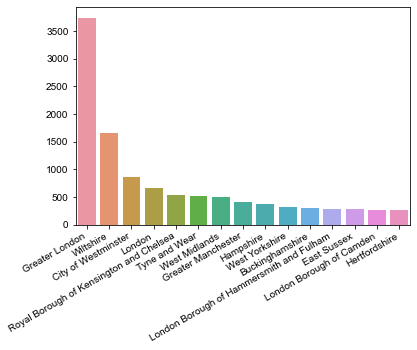

In [7]:
# top 10 counties with the most charging points
top_10_counties = sns.barplot(ncpr_df["county"].value_counts().head(15).index, ncpr_df["county"].value_counts().head(15).values)
top_10_counties.set_xticklabels(top_10_counties.get_xticklabels(), rotation = 30, ha="right")
sns.set(rc = {'figure.figsize':(25,10)})
plt.show()

### 2. Stations Per Town

In [8]:
#After constructing the pie chart, found out that there are two different inputs for London
#one as "London" and Another as "LONDON", made changes to make it all as "London"
ocm_df['Town'].replace('LONDON','London', inplace = True)

/Users/songderi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


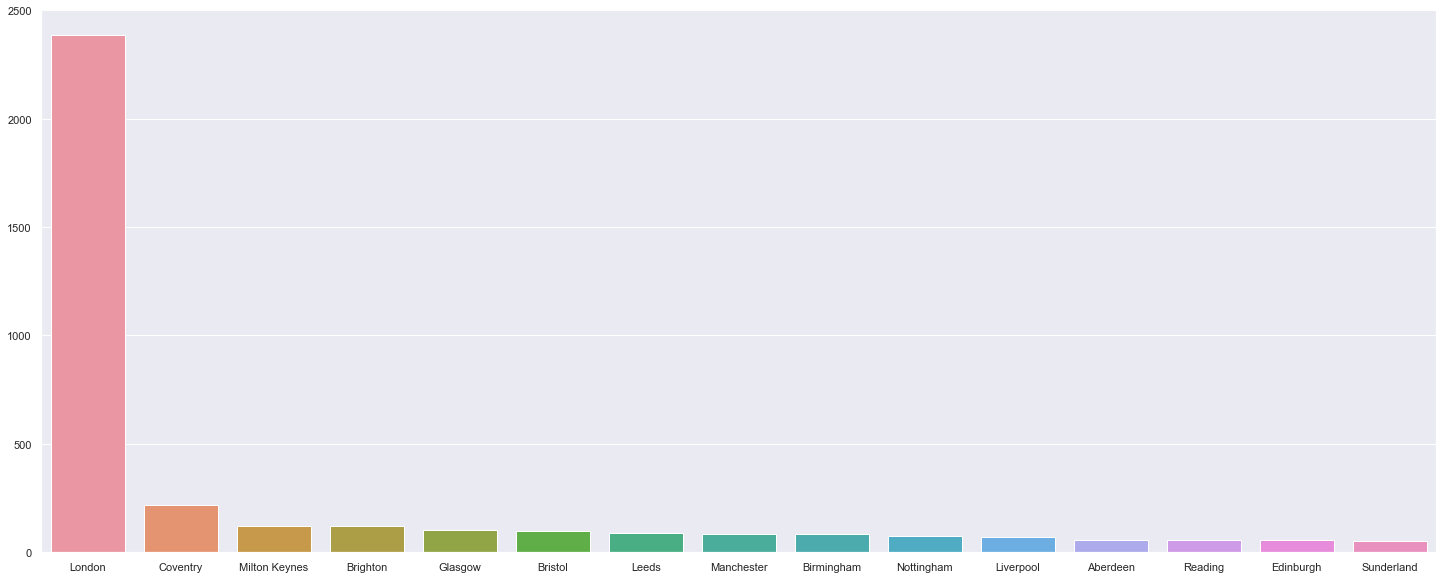

In [9]:
#plot the bar chart of top 10 towns in terms of number charging points, each point may contain more than one charging station 
top_10_towns = sns.barplot(ocm_df["Town"].value_counts().head(15).index, ocm_df["Town"].value_counts().head(15).values)
sns.set(rc = {'figure.figsize':(25,10)})
plt.show()

The first graph is a representation of the top 10 cities in the UK in terms of the number of chargers in the city. Not surprisingly London is at the first place by a huge amount. The other cities on the list is quite proportionally distributed in terms of geographical locations in the UK. There are some cities from the southern area by the sea, the major cities of England in the northern parts as well as the three major cities in Scotland. However, only knowing the total number of devices is not informative for the sake of the analysis. Most cities in the graph are dominant in population so it is natural for them to have the most devices. We want to figure out more about how each region looks after getting adjusted to population as well as car ownership ratio which will be the main focus study in the distribution analysis in the next chapter.

### 3. Usage Type




In [10]:
#check the number different values in the Usage Type column
ocm_df['UsageType'].unique()

array(['Public - Pay At Location', 'Public - Membership Required',
       'Private - For Staff, Visitors or Customers', 'Public',
       'Privately Owned - Notice Required', 'Private - Restricted Access',
       'Public - Notice Required', '(Unknown)', nan], dtype=object)

In [11]:
#check the number value of null values in the Usage Type column
ocm_df['UsageType'].isna().sum()

56

In [12]:
#drop the null values in the dataset and create a new dataset 
ocm_usagetype = ocm_df.dropna(subset = ['UsageType'])

In [13]:
#check null values again to make sure it is null free
ocm_usagetype['UsageType'].isna().sum()

0

In [14]:
#dataset cleaning
ocm_usagetype['UsageType'].replace('Public - Notice Required','Public', inplace = True)
ocm_usagetype['UsageType'].replace('Privately Owned - Notice Required','Private - Restricted Access', inplace = True)

/var/folders/2b/85jx_gt935s7lkvfnnypcysr0000gn/T/ipykernel_6551/1237788960.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ocm_usagetype['UsageType'].replace('Public - Notice Required','Public', inplace = True)
/var/folders/2b/85jx_gt935s7lkvfnnypcysr0000gn/T/ipykernel_6551/1237788960.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ocm_usagetype['UsageType'].replace('Privately Owned - Notice Required','Private - Restricted Access', inplace = True)


Since the value "Public-notice required" and "Private-notice required" is composed of only a very small proportion of the usage type values, we are going to add them to "Public" and "Private-restriced access" accordingly.

/Users/songderi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'Public - Membership Required'),
 Text(1, 0, 'Public - Pay At Location'),
 Text(2, 0, 'Public'),
 Text(3, 0, 'Private - For Staff, Visitors or Customers'),
 Text(4, 0, 'Private - Restricted Access'),
 Text(5, 0, '(Unknown)')]

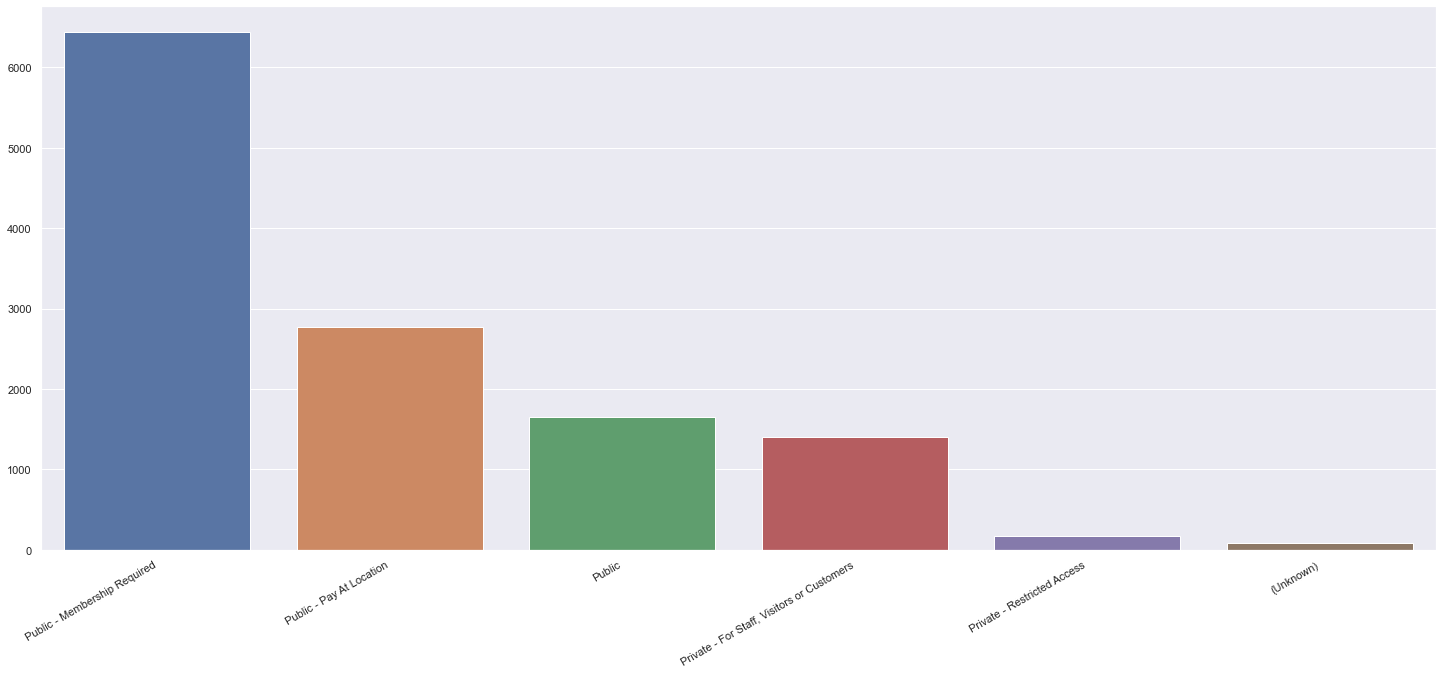

In [15]:
#plot the number of usage type for chargers in the UK
usage_type = sns.barplot(ocm_usagetype["UsageType"].value_counts().index, ocm_usagetype["UsageType"].value_counts().values)
usage_type.set_xticklabels(usage_type.get_xticklabels(), rotation = 30, ha="right")
sns.set(rc = {'figure.figsize':(25,10)})
plt.show()

This figure shows that a majority of the chargers require a membership subscription for the access to the chargers. According to the dataset, there are 386 unique charging networks provider operating in the UK. As the industry scale up, which it will, a potential problem to the entire industry is the inter-connnectability for the access to chargers from different charging networks. At the end of the day, from a customer's perspective, convenience is all that matters. This is not the problem ICE vehicles, they could get refill practically from any gas stations. So how the inter-connectability pans out, and the way EV charges are priced could either impede or facilitate the shift from traditional vehicles to electric vehicles.


### 4. Pie Chart of Number Charging Points Per Station 

In [16]:
#covert to float first
ocm_df['NumberOfPoints'].astype(float)
#check null
ocm_df['NumberOfPoints'].isna().sum()

0         4.0
1         4.0
2         4.0
3         4.0
4         2.0
         ... 
12572     3.0
12573     3.0
12574     2.0
12575     3.0
12576    10.0
Name: NumberOfPoints, Length: 12577, dtype: float64

3290

In [17]:
#drop null values
ocm_CSPP = ocm_df.dropna(subset = ['NumberOfPoints'])
#check null again
ocm_CSPP['NumberOfPoints'].isna().sum()

0

In [18]:
#drop rows where the value for number of points are 0 or negative
ocm_CSPP = ocm_CSPP[ocm_CSPP['NumberOfPoints'] > 0]
#replace values that have more than 4 points per station and aggregate them as '>4'  
ocm_CSPP['NumberOfPoints'] = np.where((ocm_CSPP.NumberOfPoints >4),'> 4.0',ocm_CSPP.NumberOfPoints)

Aggregate all the charging points with more than 4 stations together since they only compose of a small fraction of the data

([<matplotlib.patches.Wedge at 0x7f961eddf610>,
 [Text(0.15745054160123195, 1.0886731956604236, '2.0'),
  Text(-0.9229934905084094, -0.5984003814162413, '1.0'),
  Text(0.3093375257986534, -1.0556089688576769, '4.0'),
  Text(0.9011561222741259, -0.6308071363640878, '> 4.0'),
  Text(1.082822147502473, -0.19363934744295339, '3.0')],
 [Text(0.08588211360067197, 0.5938217430875037, '45.4%'),
  Text(-0.5034509948227687, -0.32640020804522246, '27.5%'),
  Text(0.16872955952653823, -0.5757867102860055, '13.3%'),
  Text(0.49153970305861405, -0.3440766198349569, '8.2%'),
  Text(0.5906302622740761, -0.10562146224161094, '5.6%')])

Text(0.5, 1.0, 'Number of Points per Station')

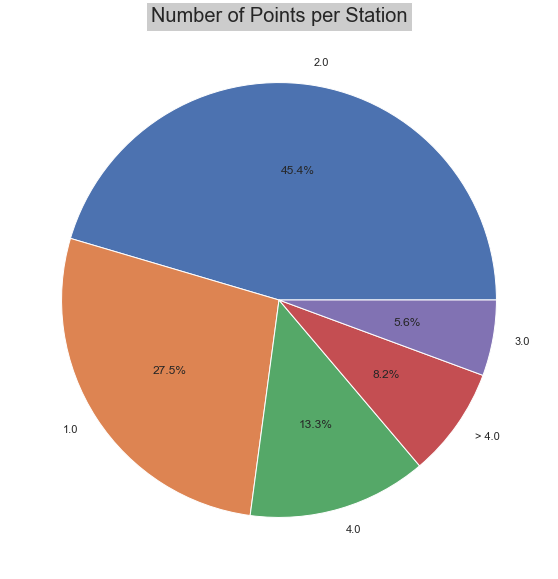

In [19]:
#create the pie chart to see the proportions
df_pie = pd.DataFrame(ocm_CSPP['NumberOfPoints'].value_counts())
df_pie.reset_index(inplace = True)
plt.pie(df_pie["NumberOfPoints"], labels = df_pie["index"], autopct='%1.1f%%')
plt.title("Number of Points per Station", bbox={'facecolor':'0.8', 'pad':5}, fontsize = 20)
plt.show()

### 5. Yearly Growth Of the Number of Charging Points

In [20]:
#covert to float first
ocm_df['NumberOfPoints'].astype(float)

0         4.0
1         4.0
2         4.0
3         4.0
4         2.0
         ... 
12572     3.0
12573     3.0
12574     2.0
12575     3.0
12576    10.0
Name: NumberOfPoints, Length: 12577, dtype: float64

In [21]:
#Check the range
ocm_df['NumberOfPoints'].unique()

array([  4.,   2.,   3.,  12.,   5.,   1.,   6.,   8.,  36.,  32.,  10.,
        38.,   7.,  18.,  nan,  14.,  16.,  27.,  19.,  26.,  50.,  11.,
         0.,  24.,  35.,  30.,  15.,   9.,  40.,  41.,  58.,  22.,  13.,
        53.,  20.,  67.,  23.,  45.,  51.,  34.,  21.,  17.,  74.,  28.,
        -4., 100.])

In [22]:
#Get rid of row with value of 0 and -4
ocm_yv = ocm_df[ocm_df['NumberOfPoints'] > 0]
#Check different values and the percentage of each particular value
arr = ocm_yv['NumberOfPoints'].value_counts(normalize = True)
arr

2.0      0.454281
1.0      0.274529
4.0      0.133118
3.0      0.056327
6.0      0.030695
8.0      0.017663
5.0      0.008185
10.0     0.005493
12.0     0.004739
16.0     0.002262
14.0     0.001939
7.0      0.001400
18.0     0.001292
20.0     0.000754
9.0      0.000646
24.0     0.000646
22.0     0.000539
11.0     0.000539
15.0     0.000539
26.0     0.000431
36.0     0.000431
30.0     0.000323
32.0     0.000323
13.0     0.000215
17.0     0.000215
34.0     0.000215
27.0     0.000215
40.0     0.000215
35.0     0.000215
38.0     0.000215
41.0     0.000108
58.0     0.000108
19.0     0.000108
53.0     0.000108
67.0     0.000108
23.0     0.000108
45.0     0.000108
51.0     0.000108
21.0     0.000108
50.0     0.000108
74.0     0.000108
28.0     0.000108
100.0    0.000108
Name: NumberOfPoints, dtype: float64

In [23]:
from pandas import DataFrame

In [24]:
#turn the series into a dataframe
frame = DataFrame(arr)
frame

NumberOfPoints
2.0          0.454281
1.0          0.274529
4.0          0.133118
3.0          0.056327
6.0          0.030695
8.0          0.017663
5.0          0.008185
10.0         0.005493
12.0         0.004739
16.0         0.002262
14.0         0.001939
7.0          0.001400
18.0         0.001292
20.0         0.000754
9.0          0.000646
24.0         0.000646
22.0         0.000539
11.0         0.000539
15.0         0.000539
26.0         0.000431
36.0         0.000431
30.0         0.000323
32.0         0.000323
13.0         0.000215
17.0         0.000215
34.0         0.000215
27.0         0.000215
40.0         0.000215
35.0         0.000215
38.0         0.000215
41.0         0.000108
58.0         0.000108
19.0         0.000108
53.0         0.000108
67.0         0.000108
23.0         0.000108
45.0         0.000108
51.0         0.000108
21.0         0.000108
50.0         0.000108
74.0         0.000108
28.0         0.000108
100.0        0.000108

In [25]:
#reset the index and the column names
frame.reset_index(inplace = True)
frame.rename(columns =  {'index':'NumberOfPoints', 'NumberOfPoints':'percentage'}, inplace = True)
frame

NumberOfPoints  percentage
0              2.0    0.454281
1              1.0    0.274529
2              4.0    0.133118
3              3.0    0.056327
4              6.0    0.030695
5              8.0    0.017663
6              5.0    0.008185
7             10.0    0.005493
8             12.0    0.004739
9             16.0    0.002262
10            14.0    0.001939
11             7.0    0.001400
12            18.0    0.001292
13            20.0    0.000754
14             9.0    0.000646
15            24.0    0.000646
16            22.0    0.000539
17            11.0    0.000539
18            15.0    0.000539
19            26.0    0.000431
20            36.0    0.000431
21            30.0    0.000323
22            32.0    0.000323
23            13.0    0.000215
24            17.0    0.000215
25            34.0    0.000215
26            27.0    0.000215
27            40.0    0.000215
28            35.0    0.000215
29            38.0    0.000215
30            41.0    0.000108
31            58.0    0.000108
32            19.0    0.000108
33            53.0    0.000108
34            67.0    0.000108
35            23.0    0.000108
36            45.0    0.000108
37            51.0    0.000108
38            21.0    0.000108
39            50.0    0.000108
40            74.0    0.000108
41            28.0    0.000108
42           100.0    0.000108

In [26]:
#add a new column that calculates number of points time percentage
frame['proportion'] = frame['NumberOfPoints']*frame['percentage']
frame

NumberOfPoints  percentage  proportion
0              2.0    0.454281    0.908562
1              1.0    0.274529    0.274529
2              4.0    0.133118    0.532472
3              3.0    0.056327    0.168982
4              6.0    0.030695    0.184168
5              8.0    0.017663    0.141303
6              5.0    0.008185    0.040926
7             10.0    0.005493    0.054927
8             12.0    0.004739    0.056866
9             16.0    0.002262    0.036187
10            14.0    0.001939    0.027141
11             7.0    0.001400    0.009801
12            18.0    0.001292    0.023263
13            20.0    0.000754    0.015078
14             9.0    0.000646    0.005816
15            24.0    0.000646    0.015509
16            22.0    0.000539    0.011847
17            11.0    0.000539    0.005924
18            15.0    0.000539    0.008078
19            26.0    0.000431    0.011201
20            36.0    0.000431    0.015509
21            30.0    0.000323    0.009693
22            32.0    0.000323    0.010339
23            13.0    0.000215    0.002800
24            17.0    0.000215    0.003662
25            34.0    0.000215    0.007324
26            27.0    0.000215    0.005816
27            40.0    0.000215    0.008616
28            35.0    0.000215    0.007539
29            38.0    0.000215    0.008185
30            41.0    0.000108    0.004416
31            58.0    0.000108    0.006247
32            19.0    0.000108    0.002046
33            53.0    0.000108    0.005708
34            67.0    0.000108    0.007216
35            23.0    0.000108    0.002477
36            45.0    0.000108    0.004847
37            51.0    0.000108    0.005493
38            21.0    0.000108    0.002262
39            50.0    0.000108    0.005385
40            74.0    0.000108    0.007970
41            28.0    0.000108    0.003016
42           100.0    0.000108    0.010770

In [27]:
#find the average number of charging points per station
frame['proportion'].sum()

2.6799138395261175

Since you have to have integer for the number of points per station, we will use the approximate number of 3 to fill the null value in the data set.


In [28]:

#fill the null value in the orginial data set with 3
ocm_yv['NumberOfPoints'].fillna(value = 3, inplace = True)
#check the number of null again to make sure
ocm_yv['NumberOfPoints'].isna().sum()

/var/folders/2b/85jx_gt935s7lkvfnnypcysr0000gn/T/ipykernel_6551/2626426335.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ocm_yv['NumberOfPoints'].fillna(value = 3, inplace = True)


0

In [29]:
#split the DateCreated into 2 columns so that we can get date and time seperated
ocm_yv[['year_created', 'time_created']] = ocm_yv['DateCreated'].str.split(' ', 1, expand=True)
#check the created column
ocm_yv

/var/folders/2b/85jx_gt935s7lkvfnnypcysr0000gn/T/ipykernel_6551/2648258971.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ocm_yv[['year_created', 'time_created']] = ocm_yv['DateCreated'].str.split(' ', 1, expand=True)
/var/folders/2b/85jx_gt935s7lkvfnnypcysr0000gn/T/ipykernel_6551/2648258971.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ocm_yv[['year_created', 'time_created']] = ocm_yv['DateCreated'].str.split(' ', 1, expand=True)


ID                                  UUID  \
0      193329  DB315699-AB98-4462-98B0-64D6A8CAFB78   
1      193327  4C07BE77-1CDC-45B1-8022-C4BCDEBE70F3   
2      193325  DDE4EE43-3AC7-47D4-AC33-4CB0080B5E95   
3      193316  8E9BC057-43F4-47DA-8342-D5C68D4EA028   
4      193315  75769D83-E8D8-4D0C-B863-10BF6F85731C   
...       ...                                   ...   
12572    4126  D3A5081E-5830-4942-9ACD-CC289EF021FC   
12573    4125  9A5CC389-52A3-4742-BF0D-736CAFF898D0   
12574    4124  5FAE63DC-8C96-436F-AAE7-2F124A18AE3D   
12575    4123  A6E82C28-7FA8-4F42-B8EF-C1A3BF584732   
12576    4121  17946796-C870-4E12-AEE6-CF765A49A91F   

                          LocationTitle          AddressLine1    AddressLine2  \
0                Faulkner Road Car Park         Faulkner Road             NaN   
1      James Street Car Park, Blaenavon          James Street             NaN   
2                  High Street Car Park           High Street             NaN   
3                         Colliers' Row         Colliers' Row             NaN   
4                             Xcel Bowl  Old Llansteffan Road             NaN   
...                                 ...                   ...             ...   
12572    Bristol Street Motors, Halifax             Shay Syke             NaN   
12573       Fred Coupe Nissan (Preston)          Chorley Road  Walton-le-Dale   
12574       Hurst Nissan Centre Belfast       62 Boucher Road             NaN   
12575        Alex F Noble & Sons Nissan         Swinton Place        Straiton   
12576             Union Square Car Park          Union Square    Guild Square   

             Town StateOrProvince  Postcode         Country   Latitude  ...  \
0         Newport           Wales      NP20  United Kingdom  51.588719  ...   
1       Blaenavon           Wales   NP4 9EH  United Kingdom  51.772424  ...   
2          Blaina           Wales      NP23  United Kingdom  51.767528  ...   
3       Ebbw Vale           Wales      NP23  United Kingdom  51.782460  ...   
4      Carmarthen           Wales      SA31  United Kingdom  51.848680  ...   
...           ...             ...       ...             ...        ...  ...   
12572     Halifax  West Yorkshire   HX1 2ND  United Kingdom  53.716684  ...   
12573     Preston      Lancashire   PR5 4JB  United Kingdom  53.747227  ...   
12574     Belfast             NaN  BT12 6LR  United Kingdom  54.571881  ...   
12575   Edinburgh         Lothian  EH20 9FB  United Kingdom  55.875053  ...   
12576    Aberdeen   Aberdeenshire  AB11 5RG  United Kingdom  57.142000  ...   

       ChargerType                                   UsageType  \
0              NaN                    Public - Pay At Location   
1              NaN                    Public - Pay At Location   
2              NaN                    Public - Pay At Location   
3              NaN                    Public - Pay At Location   
4              NaN                    Public - Pay At Location   
...            ...                                         ...   
12572          NaN                                      Public   
12573          NaN  Private - For Staff, Visitors or Customers   
12574          NaN                                      Public   
12575          NaN                                      Public   
12576          NaN                                      Public   

       NumberOfPoints                                    GeneralComments  \
0                 4.0                                                NaN   
1                 4.0                                       Scan QR code   
2                 4.0                                                NaN   
3                 4.0                                                NaN   
4                 2.0                                       Scan QR Code   
...               ...                                                ...   
12572             3.0  Inside Nissan Dealer. Only available when deal...   
12573             3.0     I

In [30]:
#slice the string value to keep only the year information from the date
ocm_yv['year_created'] = ocm_yv['year_created'].str[-4:]
ocm_yv['year_created']

/var/folders/2b/85jx_gt935s7lkvfnnypcysr0000gn/T/ipykernel_6551/2293178511.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ocm_yv['year_created'] = ocm_yv['year_created'].str[-4:]


0        2022
1        2022
2        2022
3        2022
4        2022
         ... 
12572    2011
12573    2011
12574    2011
12575    2011
12576    2011
Name: year_created, Length: 9285, dtype: object

In [31]:

#cumulative sum for the number of chargers added each year
x=ocm_yv.groupby('year_created')['NumberOfPoints'].sum().cumsum()
x

year_created
2011      859.0
2012     1345.0
2013     2776.0
2014     3560.0
2015     7016.0
2016     9593.0
2017    12735.0
2018    15668.0
2019    20129.0
2020    22908.0
2021    24289.0
2022    24883.0
Name: NumberOfPoints, dtype: float64

/Users/songderi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Charger Points Growth in the UK')

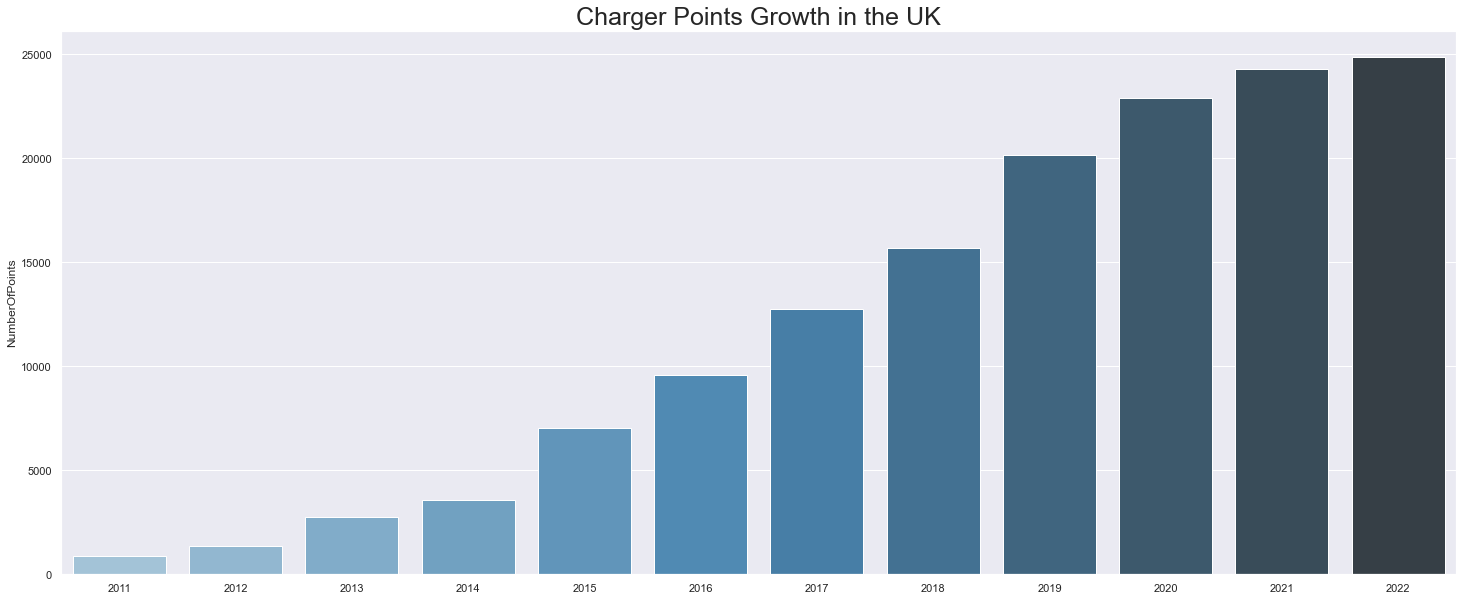

In [32]:
#plot the bar chart
year_installed = sns.barplot(ocm_yv['year_created'].value_counts().index.astype(int).sort_values().astype(str), ocm_yv.groupby('year_created')['NumberOfPoints'].sum().cumsum(), palette="Blues_d")
sns.set(rc = {'figure.figsize':(25,10)})
plt.title('Charger Points Growth in the UK', fontsize = 25)
plt.show()

The industry of charging device networks has only been around for a little over a decade in the UK. We can see from the graph that the growth rate increased quite a bit around the year of 2015 and has been quite consistent through out the rest of the 2010s and early 2020s. However, bear in mind that the dataset that is acquired for the work is lagged and according to the industry report from Zap-Map, the total number of devices has reached around 32 thousand by now. Plus, this graphs only show us the amount of total number of devices regardless of the capacity, but in fact, the chargers with higher capacity(rapid or ultra-rapid), though only account for the smaller proportion of the charger, are responsible for the most of the charging activities that happen in the UK.  

### 6.  Networks Market Share

In [33]:
#check unique device owners and count
ncpr_df.deviceOwnerName.unique()
len(ncpr_df.deviceOwnerName.unique())

array(['ecars ESB', 'POD Point', 'Milton Keynes', 'Be.EV',
       'Barnsdale Lodge', 'Leicestershire County Council',
       'Boston West Academy', 'Charles Clark Toyota',
       'City College Coventry', 'City of Stoke on Trent',
       'Corby Borough Council', 'Farmer and Carlisle Toyota',
       'Gordon Lamb Toyota ', 'Greetham Golf Club', 'Hylton Group',
       'Inchcape Toyota', 'Inchcape Toyota Nottingham', 'John Roe Toyota',
       'Loughborough University', 'City of Lincoln Council',
       'Malvern Hills District Council', 'Murley Nissan Warwick',
       'Nissan Colliers Birmingham', 'Nissan Holdcroft Stoke',
       'Nissan Sandicliffe Loughborough', 'Nissan West Way Birmingham',
       'Nissan West Way Stourbridge', 'The University of Nottingham',
       'Pinkstones Toyota', 'Randles Peugeot Stoke', 'RCS Plc',
       'Renault Retail Group', 'Renault Retail Group Leicester',
       'Richard Sanders Renault', 'Robins and Day Peugeot Birmingham',
       'Ron Brooks Toyota', 'Sare

386

/Users/songderi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, '*No Owner'),
 Text(1, 0, 'BP-Pulse (POLAR)'),
 Text(2, 0, 'Source London'),
 Text(3, 0, 'Charge Your Car'),
 Text(4, 0, 'Wiltshire Council'),
 Text(5, 0, 'City of Westminster'),
 Text(6, 0, 'EV Solutions'),
 Text(7, 0, 'Royal Borough of Kensington and Chelsea'),
 Text(8, 0, 'London Borough of Hammersmith and Fulham'),
 Text(9, 0, 'EB Charging'),
 Text(10, 0, 'Coventry City Council'),
 Text(11, 0, 'London Borough of Wandsworth'),
 Text(12, 0, 'London Borough of Southwark'),
 Text(13, 0, 'GRIDSERVE Sustainable Energy'),
 Text(14, 0, 'Osprey'),
 Text(15, 0, 'InstaVolt Ltd'),
 Text(16, 0, 'London Borough of Richmond upon Thames'),
 Text(17, 0, 'POD Point'),
 Text(18, 0, 'London Borough of Camden'),
 Text(19, 0, 'Connected Kerb')]

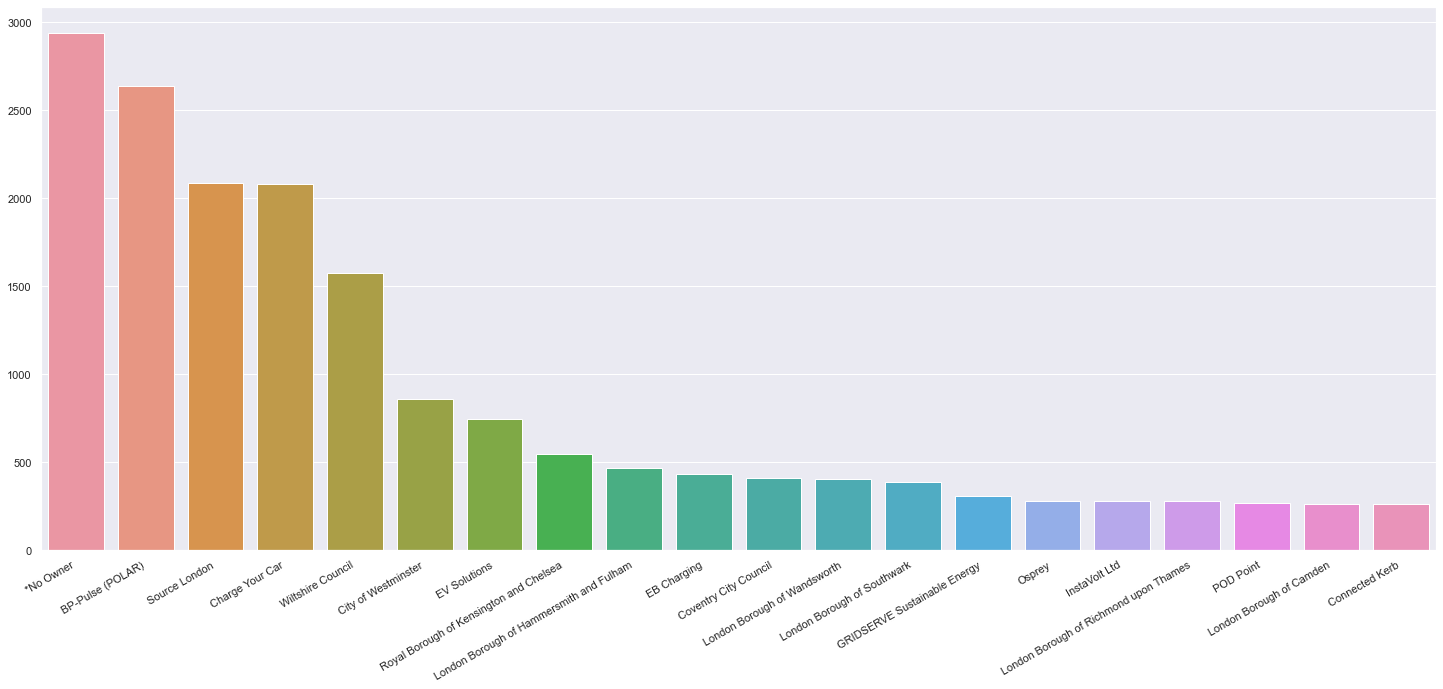

In [34]:
#plot top20 device owner in the UK
top_20_device_owner = sns.barplot(ncpr_df.deviceOwnerName.value_counts().head(20).index, ncpr_df.deviceOwnerName.value_counts().head(20).values)
top_20_device_owner.set_xticklabels(top_20_device_owner.get_xticklabels(), rotation = 30, ha="right")
sns.set(rc = {'figure.figsize':(25,10)})
plt.show()

### 7. Device Status

In [35]:
#check unique values for device status
ncpr_df.chargeDeviceStatus.unique()

array(['In service', 'Out of service', 'Planned',
       'Type 2 Mennekes (IEC62196)'], dtype=object)

In [36]:
#value counts
ncpr_df.chargeDeviceStatus.value_counts()

In service                    22603
Out of service                  168
Planned                          35
Type 2 Mennekes (IEC62196)        2
Name: chargeDeviceStatus, dtype: int64

In [37]:
#get rid of "Type 2 mennekes"
values = ['Type 2 Mennekes (IEC62196)']
ncpr_df = ncpr_df[ncpr_df.chargeDeviceStatus.isin(values) == False]

In [38]:
#check again unique values
ncpr_df.chargeDeviceStatus.unique()


array(['In service', 'Out of service', 'Planned'], dtype=object)

([<matplotlib.patches.Wedge at 0x7f961e801bb0>,
 [Text(-1.099569939864577, 0.030756257025369046, 'In service'),
  Text(1.0994088723500963, -0.036057334869479984, 'Out of service'),
  Text(1.0999872146266447, -0.0053035514436938404, 'Planned')],
 [Text(-0.5997654217443147, 0.01677614019565584, '99.1%'),
  Text(0.5996775667364161, -0.019667637201534537, '0.7%'),
  Text(0.599993026159988, -0.0028928462420148215, '0.2%')])

Text(0.5, 1.0, 'Device Status')

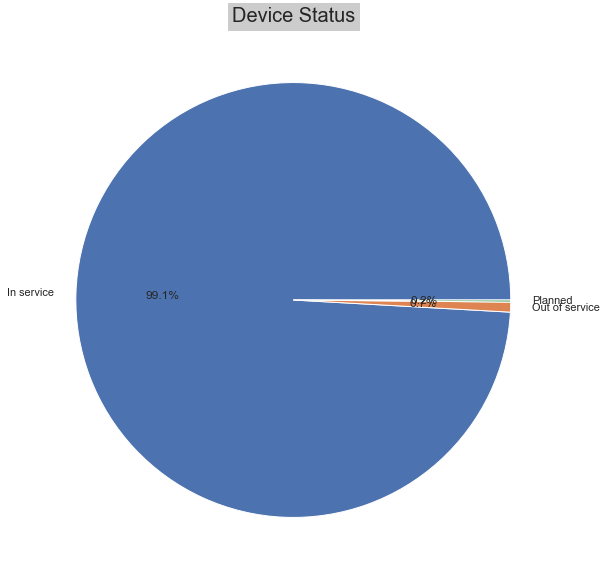

In [39]:
#create the pie chart to see the proportions
df_pie = pd.DataFrame(ncpr_df.chargeDeviceStatus.value_counts())
df_pie.reset_index(inplace = True)
plt.pie(df_pie["chargeDeviceStatus"], labels = df_pie["index"], autopct='%1.1f%%')
plt.title("Device Status", bbox={'facecolor':'0.8', 'pad':5}, fontsize = 20)
plt.show()



### 8. Payment Type (Paid or Free)

([<matplotlib.patches.Wedge at 0x7f961f9e9bb0>,
 [Text(-0.3887466340261263, 1.029017033159975, '0.0'),
  Text(0.3887466340261259, -1.0290170331599753, '1.0')],
 [Text(-0.21204361855970524, 0.5612820180872591, '61.5%'),
  Text(0.21204361855970502, -0.5612820180872592, '38.5%')])

Text(0.5, 1.0, 'Payment Type')

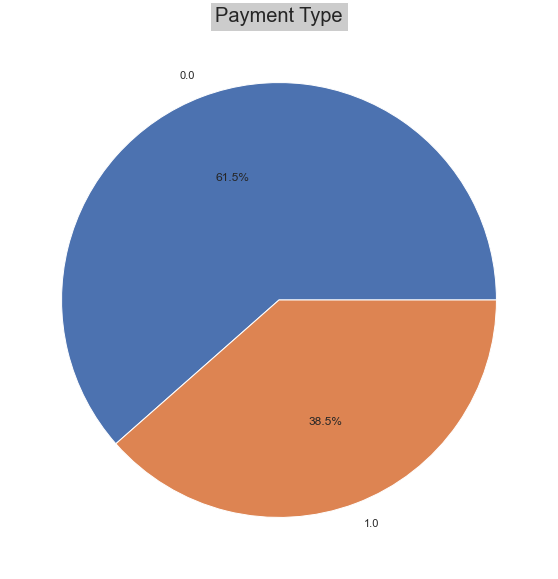

In [40]:
#create the pie chart to see the proportions
df_pie = pd.DataFrame(ncpr_df.paymentRequired.value_counts())
df_pie.reset_index(inplace = True)
plt.pie(df_pie["paymentRequired"], labels = df_pie["index"], autopct='%1.1f%%')
plt.title("Payment Type", bbox={'facecolor':'0.8', 'pad':5}, fontsize = 20)
plt.show()

### 9. Subscription Requirement

([<matplotlib.patches.Wedge at 0x7f961fc8d130>,
 [Text(-0.49534835838694985, 0.9821557940792052, '0.0'),
  Text(0.4953482664308853, -0.9821558404570615, '1.0')],
 [Text(-0.27019001366560896, 0.5357213422250209, '64.9%'),
  Text(0.2701899635077556, -0.5357213675220335, '35.1%')])

Text(0.5, 1.0, 'Subscription Requirement')

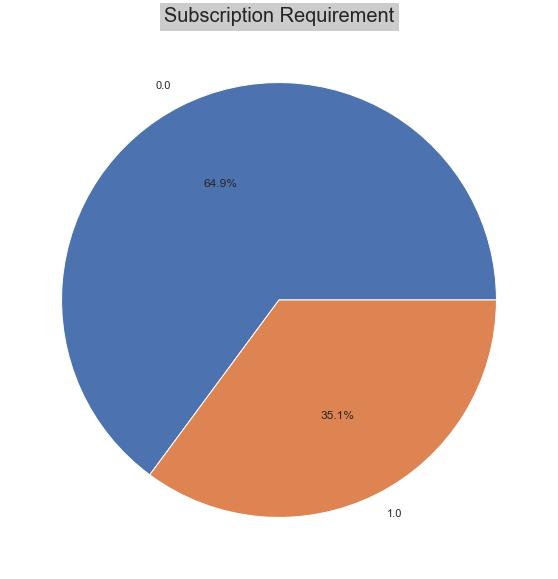

In [41]:
#create the pie chart to see the proportions
df_pie = pd.DataFrame(ncpr_df.subscriptionRequired.value_counts())
df_pie.reset_index(inplace = True)
plt.pie(df_pie["subscriptionRequired"], labels = df_pie["index"], autopct='%1.1f%%')
plt.title("Subscription Requirement", bbox={'facecolor':'0.8', 'pad':5}, fontsize = 20)
plt.show()

### 10. Location Type

In [42]:
#check different unique values for Location type feature
ncpr_df.locationType.unique()

array(['Public car park', 'On-street', 'Park & Ride site',
       'Retail car park', 'Other', 'Leisure centre',
       'Dealership forecourt', 'NHS property', 'Workplace car park',
       'Educational establishment', 'Service station', 'Public estate',
       'Hotel / Accommodation', nan, 'Private home'], dtype=object)

In [43]:
#check null values
ncpr_df.locationType.isna().sum()

1553

In [44]:
#create a new dataset with null values dropped
ncpr_loc = ncpr_df.dropna(subset = ['locationType'])
#check null again
ncpr_loc['locationType'].isna().sum()

0

/Users/songderi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'On-street'),
 Text(1, 0, 'Public car park'),
 Text(2, 0, 'Other'),
 Text(3, 0, 'Retail car park'),
 Text(4, 0, 'Workplace car park'),
 Text(5, 0, 'Leisure centre'),
 Text(6, 0, 'Service station'),
 Text(7, 0, 'Park & Ride site'),
 Text(8, 0, 'Educational establishment'),
 Text(9, 0, 'Hotel / Accommodation'),
 Text(10, 0, 'NHS property'),
 Text(11, 0, 'Dealership forecourt'),
 Text(12, 0, 'Public estate'),
 Text(13, 0, 'Private home')]

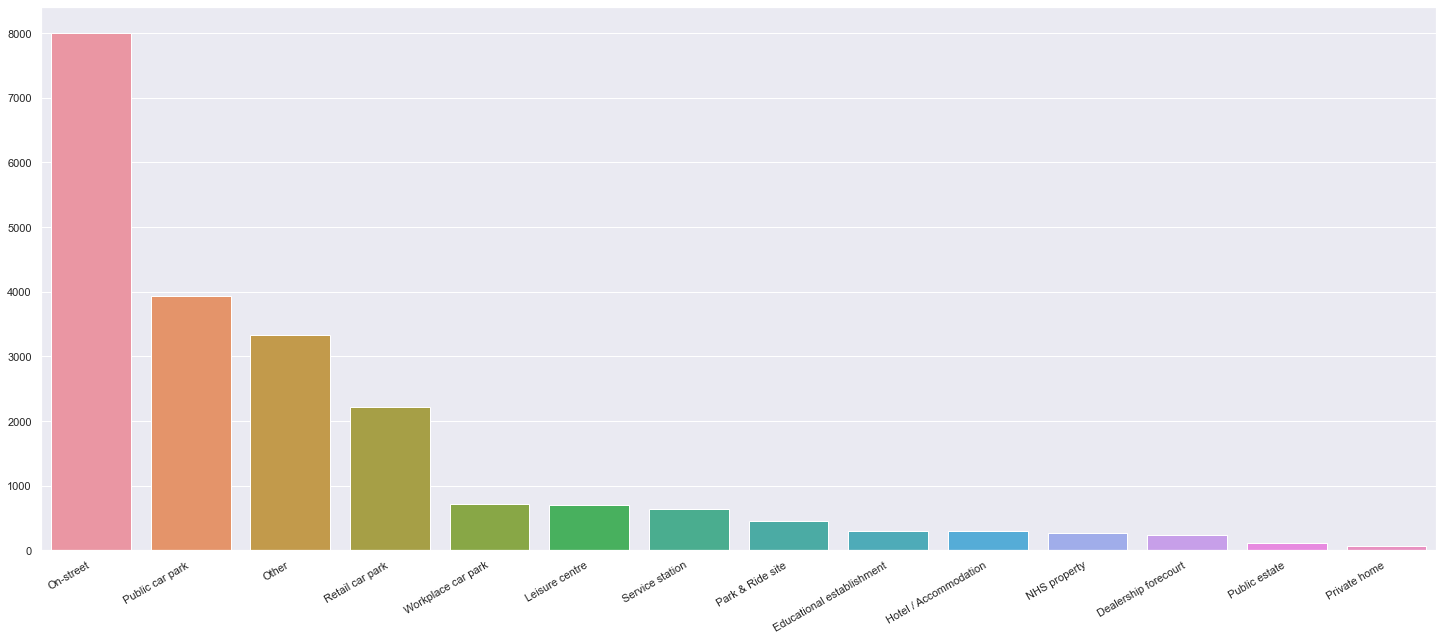

In [45]:
#plot the number of each location type 
loc_type = sns.barplot(ncpr_loc.locationType.value_counts().index, ncpr_loc.locationType.value_counts().values)
loc_type.set_xticklabels(loc_type.get_xticklabels(), rotation = 30, ha="right")
sns.set(rc = {'figure.figsize':(25,10)})
plt.show()

The next thing on the radar is to pivot into the location type distribution for the connectors. There top location types can in the graph can be grouped into three major groups: street, car park, public establishment like mall,hotel, and schools. Overall, from a customer's point of view, the distribution of the connectors in terms of the types location is quite healthy: with a majority of the chargers located on street and some in car parks and some other public location where they could charge their car while they are off to do something else.

### 11. Charging Connecting Type

In [46]:
#check different unique values for Location type feature
ncpr_df.connector1Type.unique()

array(['Type 2 Mennekes (IEC62196)', 'CCS Type 2 Combo (IEC62196)',
       'JEVS G105 (CHAdeMO) DC', '3-pin Type G (BS1363)',
       'Type 1 SAEJ1772 (IEC 62196)', nan, 'Type 3 Scame (IEC62196)',
       'Type 2 Tesla (IEC62196) DC'], dtype=object)

In [47]:
#check null values
ncpr_df.connector1Type.isna().sum()

1553

In [48]:
#create a new dataset with null values dropped
ncpr_ct = ncpr_df.dropna(subset = ['connector1Type'])
#check null again
ncpr_ct['connector1Type'].isna().sum()

0

/Users/songderi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'Type 2 Mennekes (IEC62196)'),
 Text(1, 0, 'JEVS G105 (CHAdeMO) DC'),
 Text(2, 0, 'Type 1 SAEJ1772 (IEC 62196)'),
 Text(3, 0, '3-pin Type G (BS1363)'),
 Text(4, 0, 'CCS Type 2 Combo (IEC62196)'),
 Text(5, 0, 'Type 2 Tesla (IEC62196) DC'),
 Text(6, 0, 'Type 3 Scame (IEC62196)')]

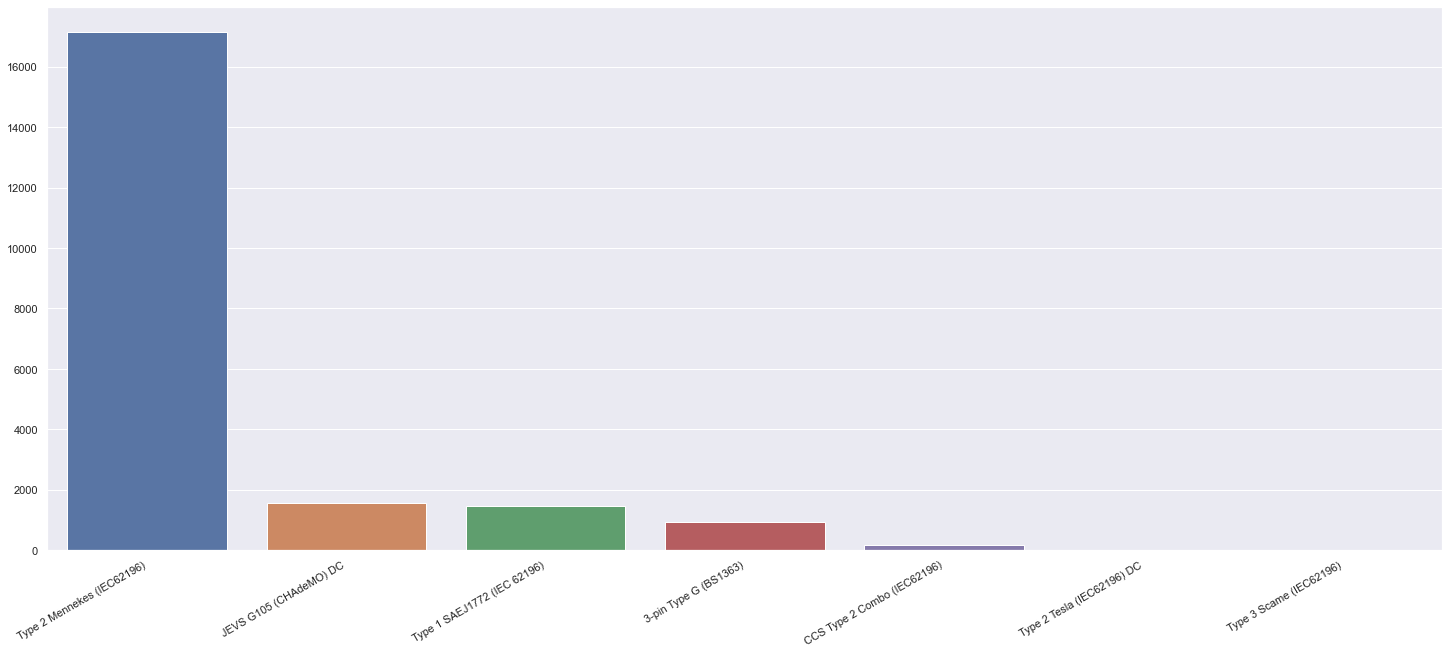

In [49]:
#create the bar chart
con_type = sns.barplot(ncpr_ct.connector1Type.value_counts().index, ncpr_loc.connector1Type.value_counts().values)
con_type.set_xticklabels(con_type.get_xticklabels(), rotation = 30, ha="right")
sns.set(rc = {'figure.figsize':(25,10)})
plt.show()

([<matplotlib.patches.Wedge at 0x7f9623513a00>,
 [Text(-0.9027917850567782, 0.6284639948588912, 'Type 2 Mennekes (IEC62196)'),
  Text(0.6064633429354644, -0.9177157586505429, 'JEVS G105 (CHAdeMO) DC'),
  Text(0.9413091576371648, -0.5691546975545502, 'Type 1 SAEJ1772 (IEC 62196)'),
  Text(1.0797834899941376, -0.20992287806735202, '3-pin Type G (BS1363)'),
  Text(1.0994949887881527, -0.033328210719152186, 'CCS Type 2 Combo (IEC62196)'),
  Text(1.0999918753550366, -0.004227783451122186, 'Type 2 Tesla (IEC62196) DC'),
  Text(1.0999998917622154, -0.0004879786005488618, 'Type 3 Scame (IEC62196)')],
 [Text(-0.49243188275824257, 0.34279854265030424, '80.6%'),
  Text(0.33079818705570785, -0.5005722319912052, '7.3%'),
  Text(0.5134413587111808, -0.3104480168479364, '6.8%'),
  Text(0.588972812724075, -0.11450338803673746, '4.4%'),
  Text(0.5997245393389923, -0.018179024028628463, '0.7%'),
  Text(0.5999955683754745, -0.002306063700612101, '0.1%'),
  Text(0.5999999409612083, -0.0002661701457539246,

Text(0.5, 1.0, 'Connector Type')

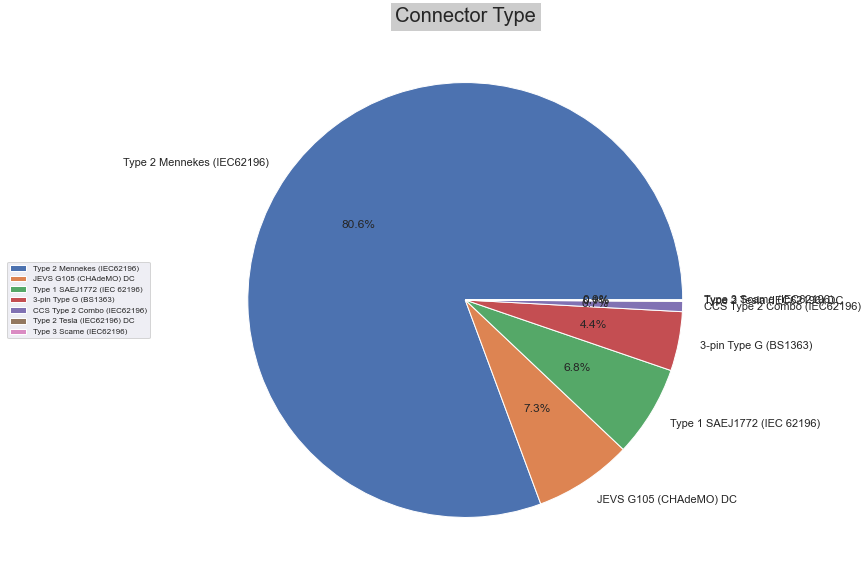

In [50]:
#create the pie chart to see the proportions
df_pie = pd.DataFrame(ncpr_ct.connector1Type.value_counts())
df_pie.reset_index(inplace = True)
plt.pie(df_pie["connector1Type"], labels = df_pie["index"], autopct='%1.1f%%')
plt.title("Connector Type", bbox={'facecolor':'0.8', 'pad':5}, fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(-0.35, .5), fontsize=8)
plt.show()

### 12. Connector Capacity 

In [51]:
#check different unique values for Location type feature
ncpr_df.connector1RatedOutputKW.unique()

array([ 22. ,  50. ,   3. ,   7. ,   3.7,  43. ,   nan, 120. ,  36. ,
       350. ,  11. , 175. , 150. , 100. ])

In [52]:
#check null values
ncpr_df.connector1RatedOutputKW.isna().sum()

1553

In [53]:
#create a new dataset with null values dropped
ncpr_output = ncpr_df.dropna(subset = ['connector1RatedOutputKW'])
#check null again
ncpr_output['connector1Type'].isna().sum()

0

In [54]:
#covert to float first
ncpr_output['connector1RatedOutputKW'].astype(float)
#check unique values again
ncpr_output.connector1RatedOutputKW.unique()

0        22.0
1        22.0
2        22.0
3        22.0
4        22.0
         ... 
22803    50.0
22804    50.0
22805    50.0
22806    50.0
22807    50.0
Name: connector1RatedOutputKW, Length: 21253, dtype: float64

array([ 22. ,  50. ,   3. ,   7. ,   3.7,  43. , 120. ,  36. , 350. ,
        11. , 175. , 150. , 100. ])

In [55]:
ncpr_output.connector1RatedOutputKW.replace([3.,3.7],'Slow Charger', inplace = True)
ncpr_output.connector1RatedOutputKW.replace([7.,11.,22.],'Fast Charger', inplace = True)
ncpr_output.connector1RatedOutputKW.replace([50.,43.,36.],'Rapid Charger', inplace = True)
ncpr_output.connector1RatedOutputKW.replace([120.,350.,175.,150.,100.],'Ultra-Rapid Charger', inplace = True)

/var/folders/2b/85jx_gt935s7lkvfnnypcysr0000gn/T/ipykernel_6551/2312586576.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ncpr_output.connector1RatedOutputKW.replace([3.,3.7],'Slow Charger', inplace = True)
/var/folders/2b/85jx_gt935s7lkvfnnypcysr0000gn/T/ipykernel_6551/2312586576.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ncpr_output.connector1RatedOutputKW.replace([7.,11.,22.],'Fast Charger', inplace = True)
/var/folders/2b/85jx_gt935s7lkvfnnypcysr0000gn/T/ipykernel_6551/2312586576.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the do

In [56]:
#check unique values again
ncpr_output.connector1RatedOutputKW.unique()

array(['Fast Charger', 'Rapid Charger', 'Slow Charger',
       'Ultra-Rapid Charger'], dtype=object)

/Users/songderi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'Fast Charger'),
 Text(1, 0, 'Slow Charger'),
 Text(2, 0, 'Rapid Charger'),
 Text(3, 0, 'Ultra-Rapid Charger')]

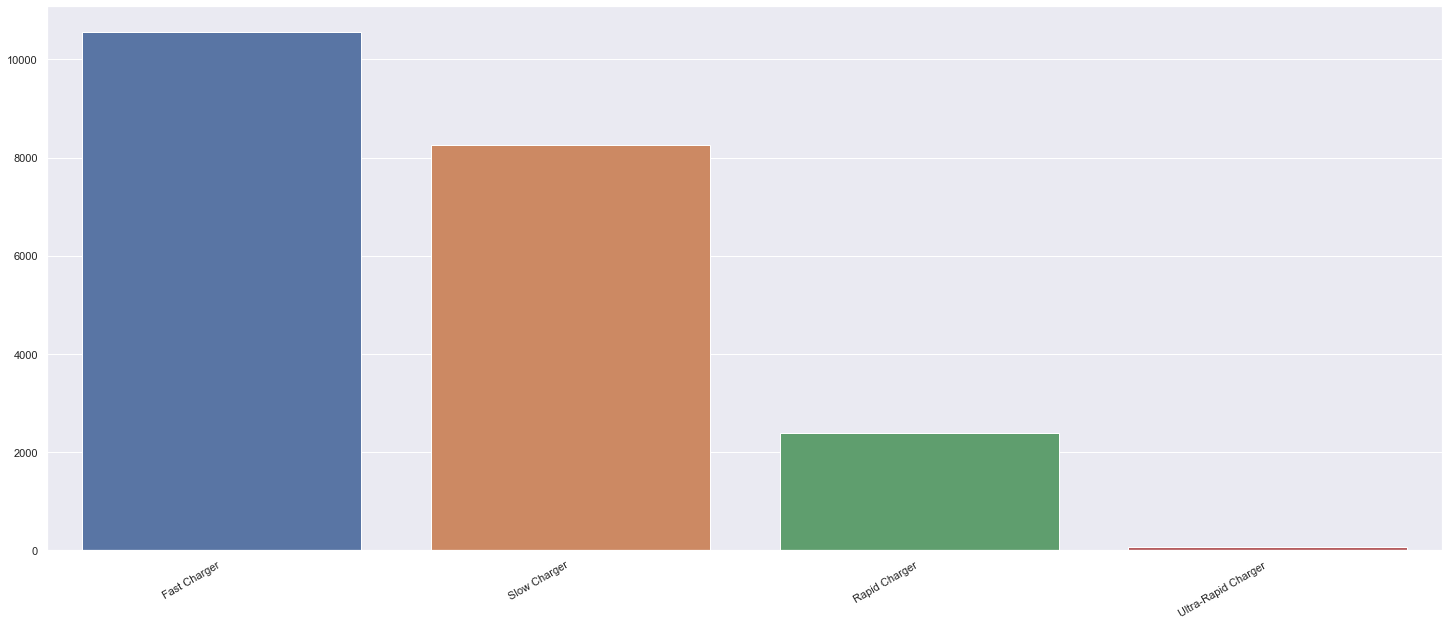

In [57]:
#create the bar chart
output_type = sns.barplot(ncpr_output.connector1RatedOutputKW.value_counts().index, ncpr_output.connector1RatedOutputKW.value_counts().values)
output_type.set_xticklabels(output_type.get_xticklabels(), rotation = 30, ha="right")
sns.set(rc = {'figure.figsize':(25,10)})
plt.show()

([<matplotlib.patches.Wedge at 0x7f96236067f0>,
 [Text(0.012438695599854763, 1.099929669957027, 'Fast Charger'),
  Text(-0.4005702729335464, -1.0244722819295524, 'Slow Charger'),
  Text(1.0257988620035803, -0.39716079201270577, 'Rapid Charger'),
  Text(1.0999649556144788, -0.00878045671009346, 'Ultra-Rapid Charger')],
 [Text(0.006784743054466234, 0.5999616381583782, '49.6%'),
  Text(-0.21849287614557075, -0.5588030628706648, '38.9%'),
  Text(0.5595266520019528, -0.21663315927965768, '11.3%'),
  Text(0.5999808848806247, -0.004789340023687342, '0.3%')])

Text(0.5, 1.0, 'Connector Output Type')

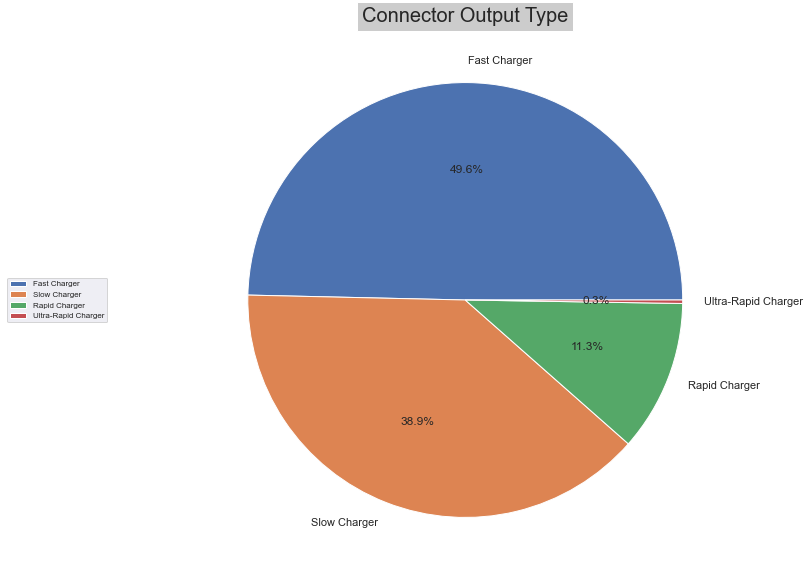

In [58]:
#create the pie chart to see the proportions
df_pie = pd.DataFrame(ncpr_output.connector1RatedOutputKW.value_counts())
df_pie.reset_index(inplace = True)
plt.pie(df_pie["connector1RatedOutputKW"], labels = df_pie["index"], autopct='%1.1f%%')
plt.title("Connector Output Type", bbox={'facecolor':'0.8', 'pad':5}, fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(-0.35, .5), fontsize=8)
plt.show()

The dataset that was acquired from the UK's government site provides information about the highest capacity for each device and we can utilize this information to categorize the chargers into 4 different capacities: slow(3-6), fast(7-22), rapid(23-99) and ultra-rapid(100+). After plotting the pie chart, we can see that the rapid annd the ulta-rapid only accounts around 12% of total chargers in the UK market. In the coming years, as EV gets increasingly higher penetration rate, the demand for the rapid and the ultra-rapid chargers would ineivatably grow and charging network providers might need to shift their focus on building more chargers with higher capacities in the remaining of the 2nd decade of the development of the EV charging industry in the UK.

### 13. Density Map of Charging Stations

In [59]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [60]:
#impot plotly.express
import plotly.express as px

In [61]:
#draw the density mapbox using uk governmennt registration data
fig = px.density_mapbox(ncpr_df, lat='latitude', lon='longitude', radius=3,
                        center=dict(lat=45, lon=0), zoom=0,
                        mapbox_style="stamen-terrain")
fig.show()

Looking at this density map, one of the most apparent features for the connectors in UK is that they are always mostly concentrated in the city areas and less in rural areas which connects different large cities. According to a charging behavior study conducted by an American scholar, since most American households have access to home charging, EV owners commuting demand is well satisfied everyday by charging at home, and most of the demand for public charging services is when they are on inter-city trips. The density distribution might serves the purpose of communicating the difference between the UK and the US market. In the UK market, people don't have as many home charging facilities so even the trips within the city would depend heavily on public charging services. 

In [62]:
#draw the density mapbox using ocm chargers data
fig = px.density_mapbox(ocm_df, lat='Latitude', lon='Longitude', radius=3,
                        center=dict(lat=45, lon=0), zoom=0,
                        mapbox_style="stamen-terrain")
fig.show()

### 14.  Choropleth Map

In [63]:
#import geopandas
import geopandas as gpd
from shapely.geometry import Point,Polygon,MultiPoint,MultiPolygon

In [64]:
#load the shape file that entails geometry data of each geographical area
df = gpd.read_file("/Users/songderi/Desktop/dissertation project/data/gadm40_GBR_shp/gadm40_GBR_3.shp")

In [65]:
#check dataset
df

ID_0         COUNTRY   NAME_1 NL_NAME_1  \
0    GBR  United Kingdom  England      None   
1    GBR  United Kingdom  England      None   
2    GBR  United Kingdom  England      None   
3    GBR  United Kingdom  England      None   
4    GBR  United Kingdom  England      None   
..   ...             ...      ...       ...   
401  GBR  United Kingdom    Wales      None   
402  GBR  United Kingdom    Wales      None   
403  GBR  United Kingdom    Wales      None   
404  GBR  United Kingdom       NA      None   
405  GBR  United Kingdom       NA      None   

                                  NAME_2 NL_NAME_2          ID_3  \
0           Bath and North East Somerset      None   GBR.1.2.1_1   
1                                Bedford      None   GBR.1.3.1_1   
2                  Blackburn with Darwen      None   GBR.1.5.1_1   
3                              Blackpool      None   GBR.1.6.1_1   
4    Bournemouth, Christchurch and Poole      None   GBR.1.8.1_1   
..                                   ...       ...           ...   
401                                   NA      None  GBR.4.20.1_1   
402                                   NA      None  GBR.4.21.1_1   
403                                   NA      None  GBR.4.22.1_1   
404                                   NA      None  GBR.1.19.1_1   
405                                   NA      None  GBR.1.35.3_1   

                           NAME_3 VARNAME_3 NL_NAME_3  \
0    Bath and North East Somerset      None      None   
1                         Bedford      None      None   
2           Blackburn with Darwen      None      None   
3                       Blackpool      None      None   
4                     Bournemouth      None      None   
..                            ...       ...       ...   
401                       Torfaen      None      None   
402             Vale of Glamorgan      None      None   
403                       Wrexham      None      None   
404     Cheshire West and Chester      None      None   
405                Forest of Dean      None      None   

                             TYPE_3                       ENGTYPE_3  CC_3  \
0                 Unitary authority               Unitary authority  None   
1                 Unitary authority               Unitary authority  None   
2                 Unitary authority               Unitary authority  None   
3                                NA                              NA  None   
4                 Unitary authority               Unitary authority  None   
..                              ...                             ...   ...   
401       Unitary authority (Wales)       Unitary authority (Wales)  None   
402       Unitary authority (Wales)       Unitary authority (Wales)  None   
403       Unitary authority (Wales)       Unitary authority (Wales)  None   
404               Unitary authority               Unitary authority  None   
405  Administrative county district  Administrative county district  None   

       HASC_3                                           geometry  
0    GB.BN.BN  POLYGON ((-2.41998 51.29636, -2.41985 51.29626...  
1    GB.FO.FO  POLYGON ((-0.51120 52.09660, -0.51163 52.09579...  
2    GB.BW.BW  POLYGON ((-2.45543 53.77399, -2.45488 53.77373...  
3          NA  POLYGON ((-3.03989 53.77958, -3.04253 53.77910...  
4    GB.BM.BM  POLYGON ((-1.84116 50.71964, -1.84116 50.71958...  
..        ...                                                ...  
401  GB.TF.TF  POLYGON ((-3.01127 51.59842, -3.01183 51.59824...  
402  GB.VG.VG  MULTIPOLYGON (((-3.25954 51.39195, -3.25956 51...  
403  GB.WX.WX  POLYGON ((-3.09817 52.92898, -3.09817 52.92899...  
404  GB.CZ.CZ  MULTIPOLYGON (((-2.74641 53.06691, -2.74578 53...  
405  GB.GC.FD  POLYGON ((-2.67085 51.63433, -2.67090 51.63441...  

[406 rows x 15 columns]

<AxesSubplot:>

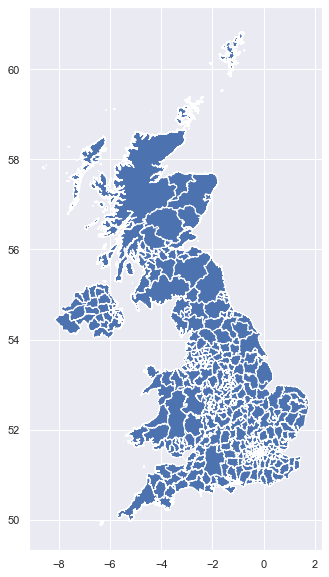

In [66]:
#check the map
df.plot()

In [67]:
#load chargers data with geopandas
ocm_charger_df = gpd.read_file('/Users/songderi/Desktop/dissertation project/data/ocmGB.csv')

In [68]:
#load population dara with geopandas
uk_pop_df = pd.read_excel('/Users/songderi/Desktop/dissertation project/data/UK_population_data.xlsx')

In [69]:
#check the population data
uk_pop_df

GEO (Labels) population
0                                               Belgium   11000638
1     Région de Bruxelles-Capitale/Brussels Hoofdste...    1136778
2     Région de Bruxelles-Capitale/Brussels Hoofdste...    1136778
3     Arr. de Bruxelles-Capitale/Arr. Brussel-Hoofdstad    1136778
4                                         Vlaams Gewest    6325740
...                                                 ...        ...
1876                                Belfast (NUTS 2013)     280960
1877                          Outer Belfast (NUTS 2013)     390595
1878               East of Northern Ireland (NUTS 2013)     438825
1879              North of Northern Ireland (NUTS 2013)     288595
1880     West and South of Northern Ireland (NUTS 2013)     411885

[1881 rows x 2 columns]

In [70]:
#convert the longitude and latitude info from chargers data into float
ocm_charger_df_loc = ocm_charger_df[['Longitude','Latitude']]
ocm_charger_df_loc['Latitude'] = ocm_charger_df_loc['Latitude'].astype(float)
ocm_charger_df_loc['Longitude'] = ocm_charger_df_loc['Longitude'].astype(float)
ocm_charger_df_loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12577 entries, 0 to 12576
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Longitude  12577 non-null  float64
 1   Latitude   12577 non-null  float64
dtypes: float64(2)
memory usage: 196.6 KB


/var/folders/2b/85jx_gt935s7lkvfnnypcysr0000gn/T/ipykernel_6551/2105388893.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/2b/85jx_gt935s7lkvfnnypcysr0000gn/T/ipykernel_6551/2105388893.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [71]:
#convert the longitude and latitude in chargers data from float to geometry data
point = gpd.GeoDataFrame(ocm_charger_df_loc, geometry=gpd.points_from_xy(ocm_charger_df_loc.Longitude, ocm_charger_df_loc.Latitude))

In [72]:
ocm_charger_df_loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12577 entries, 0 to 12576
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Longitude  12577 non-null  float64 
 1   Latitude   12577 non-null  float64 
 2   geometry   12577 non-null  geometry
dtypes: float64(2), geometry(1)
memory usage: 294.9 KB


In [73]:
#check if worked
ocm_1 = list(ocm_charger_df_loc.geometry)
print(ocm_1[1])

POINT (-3.08331 51.772424)


In [74]:
#define the function to get chargers in a cenrtain area
def get_xy_in_region(x):
    shape = df.loc[df['NAME_3']== x]
    region_shape = shape['geometry'].iloc[0]
    in_shape_xy = []
    for xy in ocm_1:
        if region_shape.contains(xy):
            in_shape_xy.append(xy)
    region_xy = len(in_shape_xy)
    return region_xy

In [75]:
#check the list of regions
region_lst = df['NAME_3'].values.tolist()
region_lst

['Bath and North East Somerset',
 'Bedford',
 'Blackburn with Darwen',
 'Blackpool',
 'Bournemouth',
 'Poole',
 'Bracknell Forest',
 'Bradford',
 'Brighton and Hove',
 'Chiltern',
 'Wycombe',
 'Calderdale',
 'Cambridge',
 'Fenland',
 'Durham',
 'Allerdale',
 'Barrow-in-Furness',
 'Carlisle',
 'Copeland',
 'Eden',
 'South Lakeland',
 'Darlington',
 'Derby',
 'Amber Valley',
 'Bolsover',
 'Chesterfield',
 'Derbyshire Dales',
 'High Peak',
 'North East Derbyshire',
 'East Devon',
 'Exeter',
 'Mid Devon',
 'North Devon',
 'Teignbridge',
 'Torridge',
 'West Devon',
 'East Dorset',
 'North Dorset',
 'Purbeck',
 'West Dorset',
 'Weymouth and Portland',
 'Eastbourne',
 'Hastings',
 'Rother',
 'Basildon',
 'Braintree',
 'Brentwood',
 'Chelmsford',
 'Colchester',
 'Epping Forest',
 'Harlow',
 'Maldon',
 'Tendring',
 'Uttlesford',
 'NA',
 'Gateshead',
 'Cheltenham',
 'Gloucester',
 'Stroud',
 'Tewkesbury',
 'Barking and Dagenham',
 'Barnet',
 'Bexley',
 'Brent',
 'Camden',
 'City of London',
 'Ci

In [76]:
#check the sum
len(region_lst)

406

In [77]:
#define the function that returns the number of chargers in each area
def get_charger_counts():
    number_of_chargers = []
    for x in region_lst:
         number_of_chargers.append(get_xy_in_region(x))
    
    return number_of_chargers

In [78]:
#get the list
charger_count_lst = get_charger_counts()
charger_count_lst

[32,
 35,
 9,
 13,
 21,
 24,
 19,
 64,
 135,
 18,
 41,
 34,
 13,
 7,
 81,
 18,
 6,
 32,
 25,
 15,
 39,
 16,
 37,
 7,
 19,
 5,
 11,
 14,
 26,
 20,
 24,
 12,
 29,
 22,
 16,
 9,
 12,
 6,
 6,
 19,
 11,
 13,
 10,
 7,
 15,
 14,
 6,
 23,
 18,
 12,
 9,
 4,
 12,
 12,
 6,
 34,
 18,
 13,
 26,
 16,
 28,
 69,
 30,
 96,
 285,
 17,
 274,
 68,
 108,
 37,
 109,
 74,
 171,
 55,
 37,
 24,
 88,
 140,
 110,
 182,
 153,
 38,
 83,
 45,
 50,
 205,
 33,
 60,
 83,
 245,
 6,
 16,
 35,
 18,
 22,
 11,
 10,
 12,
 12,
 52,
 39,
 9,
 37,
 9,
 26,
 27,
 19,
 22,
 9,
 11,
 22,
 17,
 25,
 0,
 22,
 29,
 19,
 16,
 3,
 22,
 9,
 13,
 16,
 14,
 20,
 18,
 15,
 42,
 11,
 11,
 9,
 29,
 9,
 20,
 15,
 8,
 23,
 10,
 125,
 9,
 19,
 14,
 12,
 27,
 22,
 11,
 22,
 13,
 35,
 15,
 160,
 15,
 25,
 11,
 33,
 23,
 16,
 19,
 18,
 20,
 5,
 20,
 8,
 8,
 20,
 14,
 9,
 12,
 13,
 4,
 10,
 19,
 13,
 22,
 21,
 39,
 38,
 26,
 18,
 29,
 47,
 13,
 37,
 22,
 13,
 26,
 20,
 11,
 49,
 13,
 16,
 10,
 14,
 12,
 17,
 29,
 10,
 7,
 40,
 12,
 14,
 16,
 14,
 

In [79]:
#put a new column into the dataset
df['Number_of_Chargers'] = charger_count_lst

In [80]:
df

ID_0         COUNTRY   NAME_1 NL_NAME_1  \
0    GBR  United Kingdom  England      None   
1    GBR  United Kingdom  England      None   
2    GBR  United Kingdom  England      None   
3    GBR  United Kingdom  England      None   
4    GBR  United Kingdom  England      None   
..   ...             ...      ...       ...   
401  GBR  United Kingdom    Wales      None   
402  GBR  United Kingdom    Wales      None   
403  GBR  United Kingdom    Wales      None   
404  GBR  United Kingdom       NA      None   
405  GBR  United Kingdom       NA      None   

                                  NAME_2 NL_NAME_2          ID_3  \
0           Bath and North East Somerset      None   GBR.1.2.1_1   
1                                Bedford      None   GBR.1.3.1_1   
2                  Blackburn with Darwen      None   GBR.1.5.1_1   
3                              Blackpool      None   GBR.1.6.1_1   
4    Bournemouth, Christchurch and Poole      None   GBR.1.8.1_1   
..                                   ...       ...           ...   
401                                   NA      None  GBR.4.20.1_1   
402                                   NA      None  GBR.4.21.1_1   
403                                   NA      None  GBR.4.22.1_1   
404                                   NA      None  GBR.1.19.1_1   
405                                   NA      None  GBR.1.35.3_1   

                           NAME_3 VARNAME_3 NL_NAME_3  \
0    Bath and North East Somerset      None      None   
1                         Bedford      None      None   
2           Blackburn with Darwen      None      None   
3                       Blackpool      None      None   
4                     Bournemouth      None      None   
..                            ...       ...       ...   
401                       Torfaen      None      None   
402             Vale of Glamorgan      None      None   
403                       Wrexham      None      None   
404     Cheshire West and Chester      None      None   
405                Forest of Dean      None      None   

                             TYPE_3                       ENGTYPE_3  CC_3  \
0                 Unitary authority               Unitary authority  None   
1                 Unitary authority               Unitary authority  None   
2                 Unitary authority               Unitary authority  None   
3                                NA                              NA  None   
4                 Unitary authority               Unitary authority  None   
..                              ...                             ...   ...   
401       Unitary authority (Wales)       Unitary authority (Wales)  None   
402       Unitary authority (Wales)       Unitary authority (Wales)  None   
403       Unitary authority (Wales)       Unitary authority (Wales)  None   
404               Unitary authority               Unitary authority  None   
405  Administrative county district  Administrative county district  None   

       HASC_3                                           geometry  \
0    GB.BN.BN  POLYGON ((-2.41998 51.29636, -2.41985 51.29626...   
1    GB.FO.FO  POLYGON ((-0.51120 52.09660, -0.51163 52.09579...   
2    GB.BW.BW  POLYGON ((-2.45543 53.77399, -2.45488 53.77373...   
3          NA  POLYGON ((-3.03989 53.77958, -3.04253 53.77910...   
4    GB.BM.BM  POLYGON ((-1.84116 50.71964, -1.84116 50.71958...   
..        ...                                                ...   
401  GB.TF.TF  POLYGON ((-3.01127 51.59842, -3.01183 51.59824...   
402  GB.VG.VG  MULTIPOLYGON (((-3.25954 51.39195, -3.25956 51...   
403  GB.WX.WX  POLYGON ((-3.09817 52.92898, -3.09817 52.92899...   
404  GB.CZ.CZ  MULTIPOLYGON (((-2.74641 53.06691, -2.74578 53...   
405  GB.GC.FD  POLYGON ((-2.67085 51.63433, -2.67090 51.63441...   

     Number_of_Chargers  
0                    32  
1                    35  
2                     9  
3                    13  
4                    21  
..                  ...  
401          

In [81]:
#some areas have 0 
min(df['Number_of_Chargers'])

0

In [82]:
#switched areas with low counts to 3 chargers at least for logarithmic reason
df['Number_of_Chargers'].replace([0,1,2], 3, inplace = True)

In [83]:
#convert the count into logs
x = list(np.log10(df['Number_of_Chargers']))
x

[1.505149978319906,
 1.5440680443502757,
 0.9542425094393249,
 1.1139433523068367,
 1.3222192947339193,
 1.380211241711606,
 1.2787536009528289,
 1.806179973983887,
 2.130333768495006,
 1.255272505103306,
 1.6127838567197355,
 1.5314789170422551,
 1.1139433523068367,
 0.8450980400142568,
 1.9084850188786497,
 1.255272505103306,
 0.7781512503836436,
 1.505149978319906,
 1.3979400086720377,
 1.1760912590556813,
 1.591064607026499,
 1.2041199826559248,
 1.568201724066995,
 0.8450980400142568,
 1.2787536009528289,
 0.6989700043360189,
 1.0413926851582251,
 1.146128035678238,
 1.414973347970818,
 1.3010299956639813,
 1.380211241711606,
 1.0791812460476249,
 1.462397997898956,
 1.3424226808222062,
 1.2041199826559248,
 0.9542425094393249,
 1.0791812460476249,
 0.7781512503836436,
 0.7781512503836436,
 1.2787536009528289,
 1.0413926851582251,
 1.1139433523068367,
 1.0,
 0.8450980400142568,
 1.1760912590556813,
 1.146128035678238,
 0.7781512503836436,
 1.3617278360175928,
 1.255272505103306,
 

In [84]:
#check min 
min(x)

0.47712125471966244

In [85]:
#create a new column with log of number of chargers 
df['Num_Chargers_Scale'] = x

In [86]:
#make sure there is no null value in the number of chargers column
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID_0                406 non-null    object  
 1   COUNTRY             406 non-null    object  
 2   NAME_1              406 non-null    object  
 3   NL_NAME_1           0 non-null      object  
 4   NAME_2              406 non-null    object  
 5   NL_NAME_2           0 non-null      object  
 6   ID_3                406 non-null    object  
 7   NAME_3              406 non-null    object  
 8   VARNAME_3           0 non-null      object  
 9   NL_NAME_3           0 non-null      object  
 10  TYPE_3              406 non-null    object  
 11  ENGTYPE_3           406 non-null    object  
 12  CC_3                0 non-null      object  
 13  HASC_3              406 non-null    object  
 14  geometry            406 non-null    geometry
 15  Number_of_Chargers  406 non-null

<AxesSubplot:>

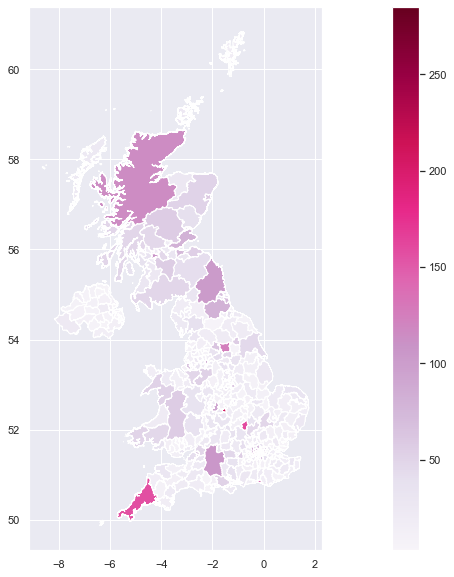

In [87]:
#plot the abosulute number of chargers
fig, ax = plt.subplots(1, 1)

df.plot(column='Number_of_Chargers', 
        ax=ax, legend=True, cmap = 'PuRd',
        figsize = (50,40))

<AxesSubplot:>

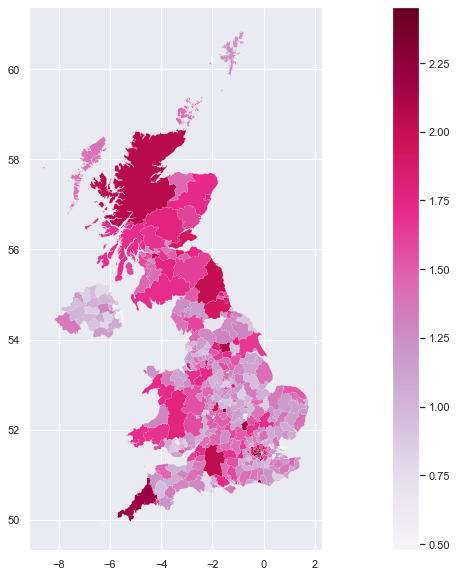

In [88]:
#plot the log for the number of charger which looks more useful
fig, ax = plt.subplots(1, 1)

df.plot(column='Num_Chargers_Scale', ax=ax, 
        legend=True, cmap = 'PuRd',linewidth=0.05
       )


In [89]:
#for missing NAME_2 values put in their NAME_3 values
df.NAME_2 = np.where(df.NAME_2=='NA',df.NAME_3, df.NAME_2)
df

ID_0         COUNTRY   NAME_1 NL_NAME_1  \
0    GBR  United Kingdom  England      None   
1    GBR  United Kingdom  England      None   
2    GBR  United Kingdom  England      None   
3    GBR  United Kingdom  England      None   
4    GBR  United Kingdom  England      None   
..   ...             ...      ...       ...   
401  GBR  United Kingdom    Wales      None   
402  GBR  United Kingdom    Wales      None   
403  GBR  United Kingdom    Wales      None   
404  GBR  United Kingdom       NA      None   
405  GBR  United Kingdom       NA      None   

                                  NAME_2 NL_NAME_2          ID_3  \
0           Bath and North East Somerset      None   GBR.1.2.1_1   
1                                Bedford      None   GBR.1.3.1_1   
2                  Blackburn with Darwen      None   GBR.1.5.1_1   
3                              Blackpool      None   GBR.1.6.1_1   
4    Bournemouth, Christchurch and Poole      None   GBR.1.8.1_1   
..                                   ...       ...           ...   
401                              Torfaen      None  GBR.4.20.1_1   
402                    Vale of Glamorgan      None  GBR.4.21.1_1   
403                              Wrexham      None  GBR.4.22.1_1   
404            Cheshire West and Chester      None  GBR.1.19.1_1   
405                       Forest of Dean      None  GBR.1.35.3_1   

                           NAME_3 VARNAME_3 NL_NAME_3  \
0    Bath and North East Somerset      None      None   
1                         Bedford      None      None   
2           Blackburn with Darwen      None      None   
3                       Blackpool      None      None   
4                     Bournemouth      None      None   
..                            ...       ...       ...   
401                       Torfaen      None      None   
402             Vale of Glamorgan      None      None   
403                       Wrexham      None      None   
404     Cheshire West and Chester      None      None   
405                Forest of Dean      None      None   

                             TYPE_3                       ENGTYPE_3  CC_3  \
0                 Unitary authority               Unitary authority  None   
1                 Unitary authority               Unitary authority  None   
2                 Unitary authority               Unitary authority  None   
3                                NA                              NA  None   
4                 Unitary authority               Unitary authority  None   
..                              ...                             ...   ...   
401       Unitary authority (Wales)       Unitary authority (Wales)  None   
402       Unitary authority (Wales)       Unitary authority (Wales)  None   
403       Unitary authority (Wales)       Unitary authority (Wales)  None   
404               Unitary authority               Unitary authority  None   
405  Administrative county district  Administrative county district  None   

       HASC_3                                           geometry  \
0    GB.BN.BN  POLYGON ((-2.41998 51.29636, -2.41985 51.29626...   
1    GB.FO.FO  POLYGON ((-0.51120 52.09660, -0.51163 52.09579...   
2    GB.BW.BW  POLYGON ((-2.45543 53.77399, -2.45488 53.77373...   
3          NA  POLYGON ((-3.03989 53.77958, -3.04253 53.77910...   
4    GB.BM.BM  POLYGON ((-1.84116 50.71964, -1.84116 50.71958...   
..        ...                                                ...   
401  GB.TF.TF  POLYGON ((-3.01127 51.59842, -3.01183 51.59824...   
402  GB.VG.VG  MULTIPOLYGON (((-3.25954 51.39195, -3.25956 51...   
403  GB.WX.WX  POLYGON ((-3.09817 52.92898, -3.09817 52.92899...   
404  GB.CZ.CZ  MULTIPOLYGON (((-2.74641 53.06691, -2.74578 53...   
405  GB.GC.FD  POLYGON ((-2.67085 51.63433, -2.67090 51.63441...   

     Number_of_Chargers  Num_Chargers_Scale  
0                    32            1.505150  
1                    35            1.544068  
2                     9            0.954243  
3          

### 14.2 Population Analysis

In [90]:
#merge with population data 
df_1 = pd.merge(df, uk_pop_df, left_on = 'NAME_2', right_on = 'GEO (Labels)', how = 'left')
df_1

ID_0         COUNTRY   NAME_1 NL_NAME_1  \
0    GBR  United Kingdom  England      None   
1    GBR  United Kingdom  England      None   
2    GBR  United Kingdom  England      None   
3    GBR  United Kingdom  England      None   
4    GBR  United Kingdom  England      None   
..   ...             ...      ...       ...   
407  GBR  United Kingdom    Wales      None   
408  GBR  United Kingdom    Wales      None   
409  GBR  United Kingdom    Wales      None   
410  GBR  United Kingdom       NA      None   
411  GBR  United Kingdom       NA      None   

                                  NAME_2 NL_NAME_2          ID_3  \
0           Bath and North East Somerset      None   GBR.1.2.1_1   
1                                Bedford      None   GBR.1.3.1_1   
2                  Blackburn with Darwen      None   GBR.1.5.1_1   
3                              Blackpool      None   GBR.1.6.1_1   
4    Bournemouth, Christchurch and Poole      None   GBR.1.8.1_1   
..                                   ...       ...           ...   
407                              Torfaen      None  GBR.4.20.1_1   
408                    Vale of Glamorgan      None  GBR.4.21.1_1   
409                              Wrexham      None  GBR.4.22.1_1   
410            Cheshire West and Chester      None  GBR.1.19.1_1   
411                       Forest of Dean      None  GBR.1.35.3_1   

                           NAME_3 VARNAME_3 NL_NAME_3  \
0    Bath and North East Somerset      None      None   
1                         Bedford      None      None   
2           Blackburn with Darwen      None      None   
3                       Blackpool      None      None   
4                     Bournemouth      None      None   
..                            ...       ...       ...   
407                       Torfaen      None      None   
408             Vale of Glamorgan      None      None   
409                       Wrexham      None      None   
410     Cheshire West and Chester      None      None   
411                Forest of Dean      None      None   

                             TYPE_3                       ENGTYPE_3  CC_3  \
0                 Unitary authority               Unitary authority  None   
1                 Unitary authority               Unitary authority  None   
2                 Unitary authority               Unitary authority  None   
3                                NA                              NA  None   
4                 Unitary authority               Unitary authority  None   
..                              ...                             ...   ...   
407       Unitary authority (Wales)       Unitary authority (Wales)  None   
408       Unitary authority (Wales)       Unitary authority (Wales)  None   
409       Unitary authority (Wales)       Unitary authority (Wales)  None   
410               Unitary authority               Unitary authority  None   
411  Administrative county district  Administrative county district  None   

       HASC_3                                           geometry  \
0    GB.BN.BN  POLYGON ((-2.41998 51.29636, -2.41985 51.29626...   
1    GB.FO.FO  POLYGON ((-0.51120 52.09660, -0.51163 52.09579...   
2    GB.BW.BW  POLYGON ((-2.45543 53.77399, -2.45488 53.77373...   
3          NA  POLYGON ((-3.03989 53.77958, -3.04253 53.77910...   
4    GB.BM.BM  POLYGON ((-1.84116 50.71964, -1.84116 50.71958...   
..        ...                                                ...   
407  GB.TF.TF  POLYGON ((-3.01127 51.59842, -3.01183 51.59824...   
408  GB.VG.VG  MULTIPOLYGON (((-3.25954 51.39195, -3.25956 51...   
409  GB.WX.WX  POLYGON ((-3.09817 52.92898, -3.09817 52.92899...   
410  GB.CZ.CZ  MULTIPOLYGON (((-2.74641 53.06691, -2.74578 53...   
411  GB.GC.FD  POLYGON ((-2.67085 51.63433, -2.67090 51.63441...   

     Number_of_Chargers  Num_Chargers_Scale               GEO (Labels)  \
0                    32            1.505150                        NaN   
1                    35            1.544068    

In [91]:
#too many nulls though
df_1.population.isnull().sum()

261

In [92]:
#check the new dataset's info
df_1 = df_1.drop_duplicates()
df_1.population = df_1.population.astype(float)
df_1.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 406 entries, 0 to 411
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID_0                406 non-null    object  
 1   COUNTRY             406 non-null    object  
 2   NAME_1              406 non-null    object  
 3   NL_NAME_1           0 non-null      object  
 4   NAME_2              406 non-null    object  
 5   NL_NAME_2           0 non-null      object  
 6   ID_3                406 non-null    object  
 7   NAME_3              406 non-null    object  
 8   VARNAME_3           0 non-null      object  
 9   NL_NAME_3           0 non-null      object  
 10  TYPE_3              406 non-null    object  
 11  ENGTYPE_3           406 non-null    object  
 12  CC_3                0 non-null      object  
 13  HASC_3              406 non-null    object  
 14  geometry            406 non-null    geometry
 15  Number_of_Chargers  406 non-null

/Users/songderi/opt/anaconda3/lib/python3.9/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [93]:
#df_1.groupby('NAME_2').sum()

In [94]:
#df_1.to_excel(r'/Users/songderi/Desktop/dissertation project/data/df_1.xlsx', index = False)

In [95]:
#had to manually add population data where was null
df_1 = pd.read_excel("/Users/songderi/Desktop/dissertation project/data/df_1.xlsx")
df_1

ID_0         COUNTRY   NAME_1  NL_NAME_1  \
0    GBR  United Kingdom  England        NaN   
1    GBR  United Kingdom  England        NaN   
2    GBR  United Kingdom  England        NaN   
3    GBR  United Kingdom  England        NaN   
4    GBR  United Kingdom  England        NaN   
..   ...             ...      ...        ...   
401  GBR  United Kingdom    Wales        NaN   
402  GBR  United Kingdom    Wales        NaN   
403  GBR  United Kingdom    Wales        NaN   
404  GBR  United Kingdom      NaN        NaN   
405  GBR  United Kingdom      NaN        NaN   

                                  NAME_2  NL_NAME_2          ID_3  \
0           Bath and North East Somerset        NaN   GBR.1.2.1_1   
1                                Bedford        NaN   GBR.1.3.1_1   
2                  Blackburn with Darwen        NaN   GBR.1.5.1_1   
3                              Blackpool        NaN   GBR.1.6.1_1   
4    Bournemouth, Christchurch and Poole        NaN   GBR.1.8.1_1   
..                                   ...        ...           ...   
401                              Torfaen        NaN  GBR.4.20.1_1   
402                    Vale of Glamorgan        NaN  GBR.4.21.1_1   
403                              Wrexham        NaN  GBR.4.22.1_1   
404            Cheshire West and Chester        NaN  GBR.1.19.1_1   
405                       Forest of Dean        NaN  GBR.1.35.3_1   

                           NAME_3  VARNAME_3  NL_NAME_3  \
0    Bath and North East Somerset        NaN        NaN   
1                         Bedford        NaN        NaN   
2           Blackburn with Darwen        NaN        NaN   
3                       Blackpool        NaN        NaN   
4                     Bournemouth        NaN        NaN   
..                            ...        ...        ...   
401                       Torfaen        NaN        NaN   
402             Vale of Glamorgan        NaN        NaN   
403                       Wrexham        NaN        NaN   
404     Cheshire West and Chester        NaN        NaN   
405                Forest of Dean        NaN        NaN   

                             TYPE_3                       ENGTYPE_3  CC_3  \
0                 Unitary authority               Unitary authority   NaN   
1                 Unitary authority               Unitary authority   NaN   
2                 Unitary authority               Unitary authority   NaN   
3                               NaN                             NaN   NaN   
4                 Unitary authority               Unitary authority   NaN   
..                              ...                             ...   ...   
401       Unitary authority (Wales)       Unitary authority (Wales)   NaN   
402       Unitary authority (Wales)       Unitary authority (Wales)   NaN   
403       Unitary authority (Wales)       Unitary authority (Wales)   NaN   
404               Unitary authority               Unitary authority   NaN   
405  Administrative county district  Administrative county district   NaN   

       HASC_3                                           geometry  \
0    GB.BN.BN  POLYGON ((-2.419980146999933 51.2963553140001,...   
1    GB.FO.FO  POLYGON ((-0.5112028179999584 52.0966015050000...   
2    GB.BW.BW  POLYGON ((-2.455431033999957 53.77399189600004...   
3         NaN  POLYGON ((-3.039889229999858 53.77958442600004...   
4    GB.BM.BM  POLYGON ((-1.841164208999942 50.71963534600019...   
..        ...                                                ...   
401  GB.TF.TF  POLYGON ((-3.011269235999976 51.5984237990001,...   
402  GB.VG.VG  MULTIPOLYGON (((-3.259540201999869 51.39195013...   
403  GB.WX.WX  POLYGON ((-3.098166647999903 52.92897769000012...   
404  GB.CZ.CZ  MULTIPOLYGON (((-2.746406674999889 53.06690590...   
405  GB.GC.FD  POLYGON ((-2.67084940999996 51.63433455799998,...   

     Number_of_Chargers  Num_Chargers_Scale               GEO (Labels)  \
0                    32            1.505150                        NaN   

In [96]:
#drop redundant columns
df_1 = df_1.drop(['population_1','GEO (Labels)'], axis = 1)

In [97]:
#change column name
df_1 = df_1.rename(columns={"population_2":"Population"})
df_1

ID_0         COUNTRY   NAME_1  NL_NAME_1  \
0    GBR  United Kingdom  England        NaN   
1    GBR  United Kingdom  England        NaN   
2    GBR  United Kingdom  England        NaN   
3    GBR  United Kingdom  England        NaN   
4    GBR  United Kingdom  England        NaN   
..   ...             ...      ...        ...   
401  GBR  United Kingdom    Wales        NaN   
402  GBR  United Kingdom    Wales        NaN   
403  GBR  United Kingdom    Wales        NaN   
404  GBR  United Kingdom      NaN        NaN   
405  GBR  United Kingdom      NaN        NaN   

                                  NAME_2  NL_NAME_2          ID_3  \
0           Bath and North East Somerset        NaN   GBR.1.2.1_1   
1                                Bedford        NaN   GBR.1.3.1_1   
2                  Blackburn with Darwen        NaN   GBR.1.5.1_1   
3                              Blackpool        NaN   GBR.1.6.1_1   
4    Bournemouth, Christchurch and Poole        NaN   GBR.1.8.1_1   
..                                   ...        ...           ...   
401                              Torfaen        NaN  GBR.4.20.1_1   
402                    Vale of Glamorgan        NaN  GBR.4.21.1_1   
403                              Wrexham        NaN  GBR.4.22.1_1   
404            Cheshire West and Chester        NaN  GBR.1.19.1_1   
405                       Forest of Dean        NaN  GBR.1.35.3_1   

                           NAME_3  VARNAME_3  NL_NAME_3  \
0    Bath and North East Somerset        NaN        NaN   
1                         Bedford        NaN        NaN   
2           Blackburn with Darwen        NaN        NaN   
3                       Blackpool        NaN        NaN   
4                     Bournemouth        NaN        NaN   
..                            ...        ...        ...   
401                       Torfaen        NaN        NaN   
402             Vale of Glamorgan        NaN        NaN   
403                       Wrexham        NaN        NaN   
404     Cheshire West and Chester        NaN        NaN   
405                Forest of Dean        NaN        NaN   

                             TYPE_3                       ENGTYPE_3  CC_3  \
0                 Unitary authority               Unitary authority   NaN   
1                 Unitary authority               Unitary authority   NaN   
2                 Unitary authority               Unitary authority   NaN   
3                               NaN                             NaN   NaN   
4                 Unitary authority               Unitary authority   NaN   
..                              ...                             ...   ...   
401       Unitary authority (Wales)       Unitary authority (Wales)   NaN   
402       Unitary authority (Wales)       Unitary authority (Wales)   NaN   
403       Unitary authority (Wales)       Unitary authority (Wales)   NaN   
404               Unitary authority               Unitary authority   NaN   
405  Administrative county district  Administrative county district   NaN   

       HASC_3                                           geometry  \
0    GB.BN.BN  POLYGON ((-2.419980146999933 51.2963553140001,...   
1    GB.FO.FO  POLYGON ((-0.5112028179999584 52.0966015050000...   
2    GB.BW.BW  POLYGON ((-2.455431033999957 53.77399189600004...   
3         NaN  POLYGON ((-3.039889229999858 53.77958442600004...   
4    GB.BM.BM  POLYGON ((-1.841164208999942 50.71963534600019...   
..        ...                                                ...   
401  GB.TF.TF  POLYGON ((-3.011269235999976 51.5984237990001,...   
402  GB.VG.VG  MULTIPOLYGON (((-3.259540201999869 51.39195013...   
403  GB.WX.WX  POLYGON ((-3.098166647999903 52.92897769000012...   
404  GB.CZ.CZ  MULTIPOLYGON (((-2.746406674999889 53.06690590...   
405  GB.GC.FD  POLYGON ((-2.67084940999996 51.63433455799998,...   

     Number_of_Chargers  Num_Chargers_Scale  Population  
0                    32            1.505150      192106  
1                    35        

In [98]:
#add a new population column into the original dataset, had to be shape file for gpd to plot
df['Population'] = df_1['Population']
df

ID_0         COUNTRY   NAME_1 NL_NAME_1  \
0    GBR  United Kingdom  England      None   
1    GBR  United Kingdom  England      None   
2    GBR  United Kingdom  England      None   
3    GBR  United Kingdom  England      None   
4    GBR  United Kingdom  England      None   
..   ...             ...      ...       ...   
401  GBR  United Kingdom    Wales      None   
402  GBR  United Kingdom    Wales      None   
403  GBR  United Kingdom    Wales      None   
404  GBR  United Kingdom       NA      None   
405  GBR  United Kingdom       NA      None   

                                  NAME_2 NL_NAME_2          ID_3  \
0           Bath and North East Somerset      None   GBR.1.2.1_1   
1                                Bedford      None   GBR.1.3.1_1   
2                  Blackburn with Darwen      None   GBR.1.5.1_1   
3                              Blackpool      None   GBR.1.6.1_1   
4    Bournemouth, Christchurch and Poole      None   GBR.1.8.1_1   
..                                   ...       ...           ...   
401                              Torfaen      None  GBR.4.20.1_1   
402                    Vale of Glamorgan      None  GBR.4.21.1_1   
403                              Wrexham      None  GBR.4.22.1_1   
404            Cheshire West and Chester      None  GBR.1.19.1_1   
405                       Forest of Dean      None  GBR.1.35.3_1   

                           NAME_3 VARNAME_3 NL_NAME_3  \
0    Bath and North East Somerset      None      None   
1                         Bedford      None      None   
2           Blackburn with Darwen      None      None   
3                       Blackpool      None      None   
4                     Bournemouth      None      None   
..                            ...       ...       ...   
401                       Torfaen      None      None   
402             Vale of Glamorgan      None      None   
403                       Wrexham      None      None   
404     Cheshire West and Chester      None      None   
405                Forest of Dean      None      None   

                             TYPE_3                       ENGTYPE_3  CC_3  \
0                 Unitary authority               Unitary authority  None   
1                 Unitary authority               Unitary authority  None   
2                 Unitary authority               Unitary authority  None   
3                                NA                              NA  None   
4                 Unitary authority               Unitary authority  None   
..                              ...                             ...   ...   
401       Unitary authority (Wales)       Unitary authority (Wales)  None   
402       Unitary authority (Wales)       Unitary authority (Wales)  None   
403       Unitary authority (Wales)       Unitary authority (Wales)  None   
404               Unitary authority               Unitary authority  None   
405  Administrative county district  Administrative county district  None   

       HASC_3                                           geometry  \
0    GB.BN.BN  POLYGON ((-2.41998 51.29636, -2.41985 51.29626...   
1    GB.FO.FO  POLYGON ((-0.51120 52.09660, -0.51163 52.09579...   
2    GB.BW.BW  POLYGON ((-2.45543 53.77399, -2.45488 53.77373...   
3          NA  POLYGON ((-3.03989 53.77958, -3.04253 53.77910...   
4    GB.BM.BM  POLYGON ((-1.84116 50.71964, -1.84116 50.71958...   
..        ...                                                ...   
401  GB.TF.TF  POLYGON ((-3.01127 51.59842, -3.01183 51.59824...   
402  GB.VG.VG  MULTIPOLYGON (((-3.25954 51.39195, -3.25956 51...   
403  GB.WX.WX  POLYGON ((-3.09817 52.92898, -3.09817 52.92899...   
404  GB.CZ.CZ  MULTIPOLYGON (((-2.74641 53.06691, -2.74578 53...   
405  GB.GC.FD  POLYGON ((-2.67085 51.63433, -2.67090 51.63441...   

     Number_of_Chargers  Num_Chargers_Scale  Population  
0                    32            1.505150      192106  
1                    35            1.544068      157480  
2                    

In [99]:
#calculate number of charger per 10000 popalation
df['Chargers_by_population'] = df['Number_of_Chargers'] /(df['Population']/10000)
df['Chargers_by_population']
df

0      1.665747
1      2.222504
2      0.610211
3      0.915074
4      0.411765
         ...   
401    0.752292
402    0.983619
403    1.323529
404    1.486605
405    1.271044
Name: Chargers_by_population, Length: 406, dtype: float64

ID_0         COUNTRY   NAME_1 NL_NAME_1  \
0    GBR  United Kingdom  England      None   
1    GBR  United Kingdom  England      None   
2    GBR  United Kingdom  England      None   
3    GBR  United Kingdom  England      None   
4    GBR  United Kingdom  England      None   
..   ...             ...      ...       ...   
401  GBR  United Kingdom    Wales      None   
402  GBR  United Kingdom    Wales      None   
403  GBR  United Kingdom    Wales      None   
404  GBR  United Kingdom       NA      None   
405  GBR  United Kingdom       NA      None   

                                  NAME_2 NL_NAME_2          ID_3  \
0           Bath and North East Somerset      None   GBR.1.2.1_1   
1                                Bedford      None   GBR.1.3.1_1   
2                  Blackburn with Darwen      None   GBR.1.5.1_1   
3                              Blackpool      None   GBR.1.6.1_1   
4    Bournemouth, Christchurch and Poole      None   GBR.1.8.1_1   
..                                   ...       ...           ...   
401                              Torfaen      None  GBR.4.20.1_1   
402                    Vale of Glamorgan      None  GBR.4.21.1_1   
403                              Wrexham      None  GBR.4.22.1_1   
404            Cheshire West and Chester      None  GBR.1.19.1_1   
405                       Forest of Dean      None  GBR.1.35.3_1   

                           NAME_3 VARNAME_3 NL_NAME_3  \
0    Bath and North East Somerset      None      None   
1                         Bedford      None      None   
2           Blackburn with Darwen      None      None   
3                       Blackpool      None      None   
4                     Bournemouth      None      None   
..                            ...       ...       ...   
401                       Torfaen      None      None   
402             Vale of Glamorgan      None      None   
403                       Wrexham      None      None   
404     Cheshire West and Chester      None      None   
405                Forest of Dean      None      None   

                             TYPE_3                       ENGTYPE_3  CC_3  \
0                 Unitary authority               Unitary authority  None   
1                 Unitary authority               Unitary authority  None   
2                 Unitary authority               Unitary authority  None   
3                                NA                              NA  None   
4                 Unitary authority               Unitary authority  None   
..                              ...                             ...   ...   
401       Unitary authority (Wales)       Unitary authority (Wales)  None   
402       Unitary authority (Wales)       Unitary authority (Wales)  None   
403       Unitary authority (Wales)       Unitary authority (Wales)  None   
404               Unitary authority               Unitary authority  None   
405  Administrative county district  Administrative county district  None   

       HASC_3                                           geometry  \
0    GB.BN.BN  POLYGON ((-2.41998 51.29636, -2.41985 51.29626...   
1    GB.FO.FO  POLYGON ((-0.51120 52.09660, -0.51163 52.09579...   
2    GB.BW.BW  POLYGON ((-2.45543 53.77399, -2.45488 53.77373...   
3          NA  POLYGON ((-3.03989 53.77958, -3.04253 53.77910...   
4    GB.BM.BM  POLYGON ((-1.84116 50.71964, -1.84116 50.71958...   
..        ...                                                ...   
401  GB.TF.TF  POLYGON ((-3.01127 51.59842, -3.01183 51.59824...   
402  GB.VG.VG  MULTIPOLYGON (((-3.25954 51.39195, -3.25956 51...   
403  GB.WX.WX  POLYGON ((-3.09817 52.92898, -3.09817 52.92899...   
404  GB.CZ.CZ  MULTIPOLYGON (((-2.74641 53.06691, -2.74578 53...   
405  GB.GC.FD  POLYGON ((-2.67085 51.63433, -2.67090 51.63441...   

     Number_of_Chargers  Num_Chargers_Scale  Population  \
0                    32            1.505150      192106   
1                    35            1.544068      157480   
2                 

In [100]:
#get the log for chargers per population as well
df['Chargers_by_population_scale'] = np.log10(df['Chargers_by_population'])

<AxesSubplot:>

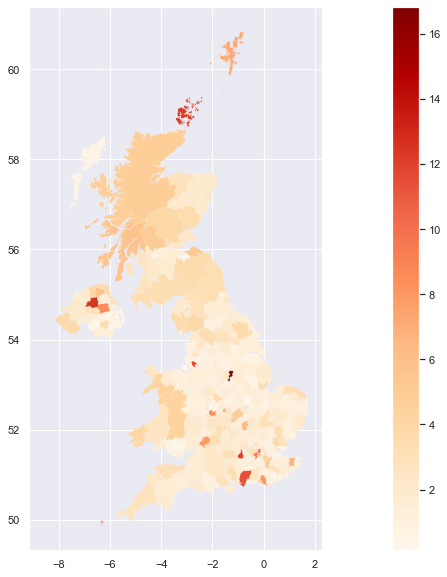

In [101]:
#plot the absolute of chagrers per population
fig, ax = plt.subplots(1, 1)

df.plot(column='Chargers_by_population', ax=ax, 
        legend=True, cmap = 'OrRd',linewidth=0.05
       )

<AxesSubplot:>

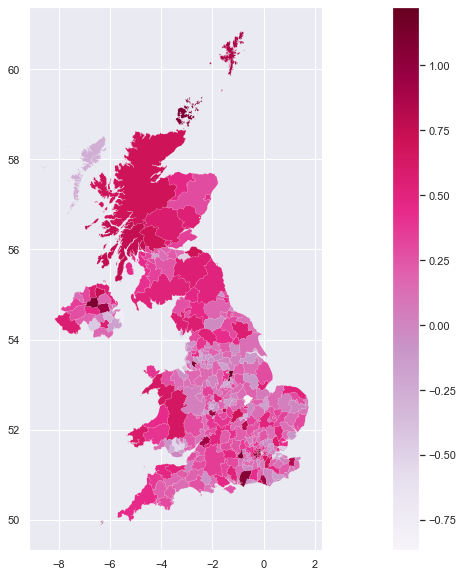

In [102]:
#plot the log of the chargers per population
fig, ax = plt.subplots(1, 1)

df.plot(column='Chargers_by_population_scale', ax=ax, 
        legend=True, cmap = 'PuRd',linewidth=0.05
       )

### 14.3 Car Ownership

In [103]:
#load car ownership data
cr_df = pd.read_excel("/Users/songderi/Desktop/dissertation project/data/car_ownership.xlsx")
cr_df

Rank         Local Authority  Cars/vans per 1000\npeople (2011)
0       1             East Dorset                                694
1       2  South Northamptonshire                                685
2       3       Stratford-on-Avon                                674
3       4                Cotswold                                670
4       5                  Maldon                                669
..    ...                     ...                                ...
343   344               Southwark                                210
344   345                  Newham                                198
345   346               Islington                                187
346   347           Tower Hamlets                                172
347   348                 Hackney                                170

[348 rows x 3 columns]

In [104]:
#merge data with df_1
df_1 = pd.merge(df_1, cr_df, left_on = 'NAME_3', right_on = 'Local Authority', how = 'left')
df_1

ID_0         COUNTRY   NAME_1  NL_NAME_1  \
0    GBR  United Kingdom  England        NaN   
1    GBR  United Kingdom  England        NaN   
2    GBR  United Kingdom  England        NaN   
3    GBR  United Kingdom  England        NaN   
4    GBR  United Kingdom  England        NaN   
..   ...             ...      ...        ...   
401  GBR  United Kingdom    Wales        NaN   
402  GBR  United Kingdom    Wales        NaN   
403  GBR  United Kingdom    Wales        NaN   
404  GBR  United Kingdom      NaN        NaN   
405  GBR  United Kingdom      NaN        NaN   

                                  NAME_2  NL_NAME_2          ID_3  \
0           Bath and North East Somerset        NaN   GBR.1.2.1_1   
1                                Bedford        NaN   GBR.1.3.1_1   
2                  Blackburn with Darwen        NaN   GBR.1.5.1_1   
3                              Blackpool        NaN   GBR.1.6.1_1   
4    Bournemouth, Christchurch and Poole        NaN   GBR.1.8.1_1   
..                                   ...        ...           ...   
401                              Torfaen        NaN  GBR.4.20.1_1   
402                    Vale of Glamorgan        NaN  GBR.4.21.1_1   
403                              Wrexham        NaN  GBR.4.22.1_1   
404            Cheshire West and Chester        NaN  GBR.1.19.1_1   
405                       Forest of Dean        NaN  GBR.1.35.3_1   

                           NAME_3  VARNAME_3  NL_NAME_3  ...  \
0    Bath and North East Somerset        NaN        NaN  ...   
1                         Bedford        NaN        NaN  ...   
2           Blackburn with Darwen        NaN        NaN  ...   
3                       Blackpool        NaN        NaN  ...   
4                     Bournemouth        NaN        NaN  ...   
..                            ...        ...        ...  ...   
401                       Torfaen        NaN        NaN  ...   
402             Vale of Glamorgan        NaN        NaN  ...   
403                       Wrexham        NaN        NaN  ...   
404     Cheshire West and Chester        NaN        NaN  ...   
405                Forest of Dean        NaN        NaN  ...   

                          ENGTYPE_3 CC_3    HASC_3  \
0                 Unitary authority  NaN  GB.BN.BN   
1                 Unitary authority  NaN  GB.FO.FO   
2                 Unitary authority  NaN  GB.BW.BW   
3                               NaN  NaN       NaN   
4                 Unitary authority  NaN  GB.BM.BM   
..                              ...  ...       ...   
401       Unitary authority (Wales)  NaN  GB.TF.TF   
402       Unitary authority (Wales)  NaN  GB.VG.VG   
403       Unitary authority (Wales)  NaN  GB.WX.WX   
404               Unitary authority  NaN  GB.CZ.CZ   
405  Administrative county district  NaN  GB.GC.FD   

                                              geometry Number_of_Chargers  \
0    POLYGON ((-2.419980146999933 51.2963553140001,...                 32   
1    POLYGON ((-0.5112028179999584 52.0966015050000...                 35   
2    POLYGON ((-2.455431033999957 53.77399189600004...                  9   
3    POLYGON ((-3.039889229999858 53.77958442600004...                 13   
4    POLYGON ((-1.841164208999942 50.71963534600019...                 21   
..                                                 ...                ...   
401  POLYGON ((-3.011269235999976 51.5984237990001,...                  7   
402  MULTIPOLYGON (((-3.259540201999869 51.39195013...                 13   
403  POLYGON ((-3.098166647999903 52.92897769000012...                 18   
404  MULTIPOLYGON (((-2.746406674999889 53.06690590...                 49   
405  POLYGON ((-2.67084940999996 51.63433455799998,...                 11   

     Num_Chargers_Scale  Population   Rank            Local Authority  \
0              1.505150      192106    NaN                        NaN   
1              1.544068      157480  183.0                    Bedford   
2              0.954243      147490 

In [105]:
#drop redundant columns
df_1 = df_1.drop(['Rank', 'Local Authority'], axis = 1)

In [106]:
#rename the car ownership column
df_1 = df_1.rename(columns={"Cars/vans per 1000\npeople (2011)": "Car_Ownership_per1000"})
df_1

ID_0         COUNTRY   NAME_1  NL_NAME_1  \
0    GBR  United Kingdom  England        NaN   
1    GBR  United Kingdom  England        NaN   
2    GBR  United Kingdom  England        NaN   
3    GBR  United Kingdom  England        NaN   
4    GBR  United Kingdom  England        NaN   
..   ...             ...      ...        ...   
401  GBR  United Kingdom    Wales        NaN   
402  GBR  United Kingdom    Wales        NaN   
403  GBR  United Kingdom    Wales        NaN   
404  GBR  United Kingdom      NaN        NaN   
405  GBR  United Kingdom      NaN        NaN   

                                  NAME_2  NL_NAME_2          ID_3  \
0           Bath and North East Somerset        NaN   GBR.1.2.1_1   
1                                Bedford        NaN   GBR.1.3.1_1   
2                  Blackburn with Darwen        NaN   GBR.1.5.1_1   
3                              Blackpool        NaN   GBR.1.6.1_1   
4    Bournemouth, Christchurch and Poole        NaN   GBR.1.8.1_1   
..                                   ...        ...           ...   
401                              Torfaen        NaN  GBR.4.20.1_1   
402                    Vale of Glamorgan        NaN  GBR.4.21.1_1   
403                              Wrexham        NaN  GBR.4.22.1_1   
404            Cheshire West and Chester        NaN  GBR.1.19.1_1   
405                       Forest of Dean        NaN  GBR.1.35.3_1   

                           NAME_3  VARNAME_3  NL_NAME_3  \
0    Bath and North East Somerset        NaN        NaN   
1                         Bedford        NaN        NaN   
2           Blackburn with Darwen        NaN        NaN   
3                       Blackpool        NaN        NaN   
4                     Bournemouth        NaN        NaN   
..                            ...        ...        ...   
401                       Torfaen        NaN        NaN   
402             Vale of Glamorgan        NaN        NaN   
403                       Wrexham        NaN        NaN   
404     Cheshire West and Chester        NaN        NaN   
405                Forest of Dean        NaN        NaN   

                             TYPE_3                       ENGTYPE_3  CC_3  \
0                 Unitary authority               Unitary authority   NaN   
1                 Unitary authority               Unitary authority   NaN   
2                 Unitary authority               Unitary authority   NaN   
3                               NaN                             NaN   NaN   
4                 Unitary authority               Unitary authority   NaN   
..                              ...                             ...   ...   
401       Unitary authority (Wales)       Unitary authority (Wales)   NaN   
402       Unitary authority (Wales)       Unitary authority (Wales)   NaN   
403       Unitary authority (Wales)       Unitary authority (Wales)   NaN   
404               Unitary authority               Unitary authority   NaN   
405  Administrative county district  Administrative county district   NaN   

       HASC_3                                           geometry  \
0    GB.BN.BN  POLYGON ((-2.419980146999933 51.2963553140001,...   
1    GB.FO.FO  POLYGON ((-0.5112028179999584 52.0966015050000...   
2    GB.BW.BW  POLYGON ((-2.455431033999957 53.77399189600004...   
3         NaN  POLYGON ((-3.039889229999858 53.77958442600004...   
4    GB.BM.BM  POLYGON ((-1.841164208999942 50.71963534600019...   
..        ...                                                ...   
401  GB.TF.TF  POLYGON ((-3.011269235999976 51.5984237990001,...   
402  GB.VG.VG  MULTIPOLYGON (((-3.259540201999869 51.39195013...   
403  GB.WX.WX  POLYGON ((-3.098166647999903 52.92897769000012...   
404  GB.CZ.CZ  MULTIPOLYGON (((-2.746406674999889 53.06690590...   
405  GB.GC.FD  POLYGON ((-2.67084940999996 51.63433455799998,...   

     Number_of_Chargers  Num_Chargers_Scale  Population  Car_Ownership_per1000  
0                    32            1.505150      192106           

In [107]:
#check null and handle null values
df_1['Car_Ownership_per1000'].isnull().sum()

#get the mean population and car ratios
df_1['Pop_Car_ratio'] = df_1['Population']/df_1['Car_Ownership_per1000']
x = round(df_1['Pop_Car_ratio'].mean(), 2) 

#fill null value using the mean 
df_1.Car_Ownership_per1000.fillna(value = df_1['Population']/x, inplace = True)

#drop redundant columns
df_1 = df_1.drop(['Pop_Car_ratio'], axis = 1)
df_1

73

ID_0         COUNTRY   NAME_1  NL_NAME_1  \
0    GBR  United Kingdom  England        NaN   
1    GBR  United Kingdom  England        NaN   
2    GBR  United Kingdom  England        NaN   
3    GBR  United Kingdom  England        NaN   
4    GBR  United Kingdom  England        NaN   
..   ...             ...      ...        ...   
401  GBR  United Kingdom    Wales        NaN   
402  GBR  United Kingdom    Wales        NaN   
403  GBR  United Kingdom    Wales        NaN   
404  GBR  United Kingdom      NaN        NaN   
405  GBR  United Kingdom      NaN        NaN   

                                  NAME_2  NL_NAME_2          ID_3  \
0           Bath and North East Somerset        NaN   GBR.1.2.1_1   
1                                Bedford        NaN   GBR.1.3.1_1   
2                  Blackburn with Darwen        NaN   GBR.1.5.1_1   
3                              Blackpool        NaN   GBR.1.6.1_1   
4    Bournemouth, Christchurch and Poole        NaN   GBR.1.8.1_1   
..                                   ...        ...           ...   
401                              Torfaen        NaN  GBR.4.20.1_1   
402                    Vale of Glamorgan        NaN  GBR.4.21.1_1   
403                              Wrexham        NaN  GBR.4.22.1_1   
404            Cheshire West and Chester        NaN  GBR.1.19.1_1   
405                       Forest of Dean        NaN  GBR.1.35.3_1   

                           NAME_3  VARNAME_3  NL_NAME_3  \
0    Bath and North East Somerset        NaN        NaN   
1                         Bedford        NaN        NaN   
2           Blackburn with Darwen        NaN        NaN   
3                       Blackpool        NaN        NaN   
4                     Bournemouth        NaN        NaN   
..                            ...        ...        ...   
401                       Torfaen        NaN        NaN   
402             Vale of Glamorgan        NaN        NaN   
403                       Wrexham        NaN        NaN   
404     Cheshire West and Chester        NaN        NaN   
405                Forest of Dean        NaN        NaN   

                             TYPE_3                       ENGTYPE_3  CC_3  \
0                 Unitary authority               Unitary authority   NaN   
1                 Unitary authority               Unitary authority   NaN   
2                 Unitary authority               Unitary authority   NaN   
3                               NaN                             NaN   NaN   
4                 Unitary authority               Unitary authority   NaN   
..                              ...                             ...   ...   
401       Unitary authority (Wales)       Unitary authority (Wales)   NaN   
402       Unitary authority (Wales)       Unitary authority (Wales)   NaN   
403       Unitary authority (Wales)       Unitary authority (Wales)   NaN   
404               Unitary authority               Unitary authority   NaN   
405  Administrative county district  Administrative county district   NaN   

       HASC_3                                           geometry  \
0    GB.BN.BN  POLYGON ((-2.419980146999933 51.2963553140001,...   
1    GB.FO.FO  POLYGON ((-0.5112028179999584 52.0966015050000...   
2    GB.BW.BW  POLYGON ((-2.455431033999957 53.77399189600004...   
3         NaN  POLYGON ((-3.039889229999858 53.77958442600004...   
4    GB.BM.BM  POLYGON ((-1.841164208999942 50.71963534600019...   
..        ...                                                ...   
401  GB.TF.TF  POLYGON ((-3.011269235999976 51.5984237990001,...   
402  GB.VG.VG  MULTIPOLYGON (((-3.259540201999869 51.39195013...   
403  GB.WX.WX  POLYGON ((-3.098166647999903 52.92897769000012...   
404  GB.CZ.CZ  MULTIPOLYGON (((-2.746406674999889 53.06690590...   
405  GB.GC.FD  POLYGON ((-2.67084940999996 51.63433455799998,...   

     Number_of_Chargers  Num_Chargers_Scale  Population  Car_Ownership_per1000  
0                    32            1.505150      192106           

In [108]:
#get the chargers per car ownership per 1000 pop
df_1['Charger_Car_ratio'] = df_1['Number_of_Chargers']/df_1['Car_Ownership_per1000']
df_1['Charger_Car_ratio']

#add to main dataframe
df['Charger_Car_ratio'] = df_1['Charger_Car_ratio']
df

0      0.061429
1      0.066414
2      0.022727
3      0.032178
4      0.041502
         ...   
401    0.013752
402    0.036274
403    0.034026
404    0.085664
405    0.017350
Name: Charger_Car_ratio, Length: 406, dtype: float64

ID_0         COUNTRY   NAME_1 NL_NAME_1  \
0    GBR  United Kingdom  England      None   
1    GBR  United Kingdom  England      None   
2    GBR  United Kingdom  England      None   
3    GBR  United Kingdom  England      None   
4    GBR  United Kingdom  England      None   
..   ...             ...      ...       ...   
401  GBR  United Kingdom    Wales      None   
402  GBR  United Kingdom    Wales      None   
403  GBR  United Kingdom    Wales      None   
404  GBR  United Kingdom       NA      None   
405  GBR  United Kingdom       NA      None   

                                  NAME_2 NL_NAME_2          ID_3  \
0           Bath and North East Somerset      None   GBR.1.2.1_1   
1                                Bedford      None   GBR.1.3.1_1   
2                  Blackburn with Darwen      None   GBR.1.5.1_1   
3                              Blackpool      None   GBR.1.6.1_1   
4    Bournemouth, Christchurch and Poole      None   GBR.1.8.1_1   
..                                   ...       ...           ...   
401                              Torfaen      None  GBR.4.20.1_1   
402                    Vale of Glamorgan      None  GBR.4.21.1_1   
403                              Wrexham      None  GBR.4.22.1_1   
404            Cheshire West and Chester      None  GBR.1.19.1_1   
405                       Forest of Dean      None  GBR.1.35.3_1   

                           NAME_3 VARNAME_3 NL_NAME_3  ...  \
0    Bath and North East Somerset      None      None  ...   
1                         Bedford      None      None  ...   
2           Blackburn with Darwen      None      None  ...   
3                       Blackpool      None      None  ...   
4                     Bournemouth      None      None  ...   
..                            ...       ...       ...  ...   
401                       Torfaen      None      None  ...   
402             Vale of Glamorgan      None      None  ...   
403                       Wrexham      None      None  ...   
404     Cheshire West and Chester      None      None  ...   
405                Forest of Dean      None      None  ...   

                          ENGTYPE_3  CC_3    HASC_3  \
0                 Unitary authority  None  GB.BN.BN   
1                 Unitary authority  None  GB.FO.FO   
2                 Unitary authority  None  GB.BW.BW   
3                                NA  None        NA   
4                 Unitary authority  None  GB.BM.BM   
..                              ...   ...       ...   
401       Unitary authority (Wales)  None  GB.TF.TF   
402       Unitary authority (Wales)  None  GB.VG.VG   
403       Unitary authority (Wales)  None  GB.WX.WX   
404               Unitary authority  None  GB.CZ.CZ   
405  Administrative county district  None  GB.GC.FD   

                                              geometry Number_of_Chargers  \
0    POLYGON ((-2.41998 51.29636, -2.41985 51.29626...                 32   
1    POLYGON ((-0.51120 52.09660, -0.51163 52.09579...                 35   
2    POLYGON ((-2.45543 53.77399, -2.45488 53.77373...                  9   
3    POLYGON ((-3.03989 53.77958, -3.04253 53.77910...                 13   
4    POLYGON ((-1.84116 50.71964, -1.84116 50.71958...                 21   
..                                                 ...                ...   
401  POLYGON ((-3.01127 51.59842, -3.01183 51.59824...                  7   
402  MULTIPOLYGON (((-3.25954 51.39195, -3.25956 51...                 13   
403  POLYGON ((-3.09817 52.92898, -3.09817 52.92899...                 18   
404  MULTIPOLYGON (((-2.74641 53.06691, -2.74578 53...                 49   
405  POLYGON ((-2.67085 51.63433, -2.67090 51.63441...                 11   

     Num_Chargers_Scale  Population  Chargers_by_population  \
0              1.505150      192106                1.665747   
1              1.544068      157480                2.222504   
2              0.954243      147490                0.610211   
3              1.113943      142065    

In [109]:
#scale the charger car ration columns by taking log
df['Chargers_by_Cars_scale'] = np.log10(df['Charger_Car_ratio'])


<AxesSubplot:>

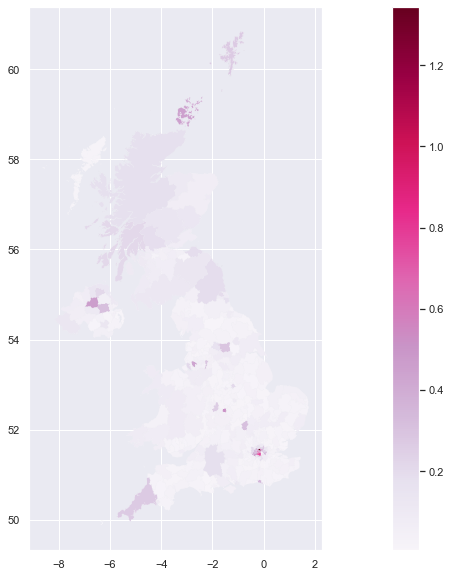

In [110]:
#plot the graph
fig, ax = plt.subplots(1, 1)

df.plot(column='Charger_Car_ratio', ax=ax, 
        legend=True, cmap = 'PuRd',linewidth=0.05
       )

<AxesSubplot:>

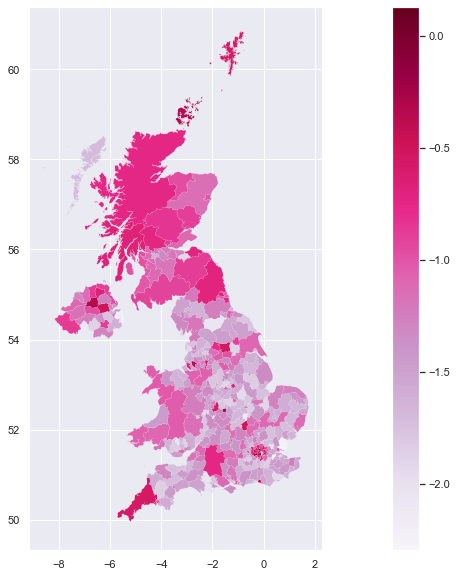

In [111]:
#plot the graph
fig, ax = plt.subplots(1, 1)

df.plot(column='Chargers_by_Cars_scale', ax=ax, 
        legend=True, cmap = 'PuRd',linewidth=0.05
       )

### 15. By Year Analysis

In [112]:
#check the ocm chargers dataset again
ocm_df

ID                                  UUID  \
0      193329  DB315699-AB98-4462-98B0-64D6A8CAFB78   
1      193327  4C07BE77-1CDC-45B1-8022-C4BCDEBE70F3   
2      193325  DDE4EE43-3AC7-47D4-AC33-4CB0080B5E95   
3      193316  8E9BC057-43F4-47DA-8342-D5C68D4EA028   
4      193315  75769D83-E8D8-4D0C-B863-10BF6F85731C   
...       ...                                   ...   
12572    4126  D3A5081E-5830-4942-9ACD-CC289EF021FC   
12573    4125  9A5CC389-52A3-4742-BF0D-736CAFF898D0   
12574    4124  5FAE63DC-8C96-436F-AAE7-2F124A18AE3D   
12575    4123  A6E82C28-7FA8-4F42-B8EF-C1A3BF584732   
12576    4121  17946796-C870-4E12-AEE6-CF765A49A91F   

                          LocationTitle          AddressLine1    AddressLine2  \
0                Faulkner Road Car Park         Faulkner Road             NaN   
1      James Street Car Park, Blaenavon          James Street             NaN   
2                  High Street Car Park           High Street             NaN   
3                         Colliers' Row         Colliers' Row             NaN   
4                             Xcel Bowl  Old Llansteffan Road             NaN   
...                                 ...                   ...             ...   
12572    Bristol Street Motors, Halifax             Shay Syke             NaN   
12573       Fred Coupe Nissan (Preston)          Chorley Road  Walton-le-Dale   
12574       Hurst Nissan Centre Belfast       62 Boucher Road             NaN   
12575        Alex F Noble & Sons Nissan         Swinton Place        Straiton   
12576             Union Square Car Park          Union Square    Guild Square   

             Town StateOrProvince  Postcode         Country   Latitude  ...  \
0         Newport           Wales      NP20  United Kingdom  51.588719  ...   
1       Blaenavon           Wales   NP4 9EH  United Kingdom  51.772424  ...   
2          Blaina           Wales      NP23  United Kingdom  51.767528  ...   
3       Ebbw Vale           Wales      NP23  United Kingdom  51.782460  ...   
4      Carmarthen           Wales      SA31  United Kingdom  51.848680  ...   
...           ...             ...       ...             ...        ...  ...   
12572     Halifax  West Yorkshire   HX1 2ND  United Kingdom  53.716684  ...   
12573     Preston      Lancashire   PR5 4JB  United Kingdom  53.747227  ...   
12574     Belfast             NaN  BT12 6LR  United Kingdom  54.571881  ...   
12575   Edinburgh         Lothian  EH20 9FB  United Kingdom  55.875053  ...   
12576    Aberdeen   Aberdeenshire  AB11 5RG  United Kingdom  57.142000  ...   

                                         Addr_RelatedURL  \
0                                                    NaN   
1                                                    NaN   
2                                                    NaN   
3                                                    NaN   
4                                                    NaN   
...                                                  ...   
12572               http://www.lightcliffe.nissan.co.uk/   
12573                     http://fredcoupe.nissan.co.uk/   
12574                                                NaN   
12575                       http://afnoble.nissan.co.uk/   
12576  http://www.unionsquareaberdeen.com/website/car...   

                                    ConnectionType  ChargerType  \
0      Type 2 (Socket Only); Type 2 (Socket Only);          NaN   
1      Type 2 (Socket Only); Type 2 (Socket Only);          NaN   
2      Type 2 (Socket Only); Type 2 (Socket Only);          NaN   
3      Type 2 (Socket Only); Type 2 (Socket Only);          NaN   
4                            Type 2 (Socket Only);          NaN   
...                                            ...          ...   
12572                CHAdeMO; BS1363 3 Pin 13 Amp;          NaN   
12573                CHAdeMO; BS1363 3 Pin 13 Amp;          NaN   
12574                CHAdeMO; BS1363 3 Pin 13 Amp;          NaN   
12575               CHAdeMO; Type 2 (

In [113]:
#manipulate the datacreated column to get the year that was created
ocm_df['YearCreated']= ocm_df['DateCreated'].apply(lambda x:x.split(' ')[0][-4:])

In [114]:
#check the number oof values
ocm_df['YearCreated'].unique()

array(['2022', '2021', '2020', '2019', '2018', '2017', '2016', '2015',
       '2014', '2013', '2012', '2011'], dtype=object)

In [115]:
#convert the values into integer
ocm_df['YearCreated'] = ocm_df['YearCreated'].astype(int)

In [116]:
#creat dataframe that includes the charger that were installed by selected year,cumulative
ocm_df_2011 = ocm_df[ocm_df['YearCreated'] <= 2011]
ocm_df_2014 = ocm_df[ocm_df['YearCreated'] <= 2014]
ocm_df_2017 = ocm_df[ocm_df['YearCreated'] <= 2017]
ocm_df_2020 = ocm_df[ocm_df['YearCreated'] <= 2020]

In [117]:
#get their coordinates and turn them into geographical data
def get_coordinates(dataset):
    dataset = dataset[['Longitude','Latitude']]
    dataset['Latitude'] = dataset['Latitude'].astype(float)
    dataset['Longitude'] = dataset['Longitude'].astype(float)
    point = gpd.GeoDataFrame(dataset, geometry=gpd.points_from_xy(dataset.Longitude, dataset.Latitude))
    dataset_geometry_lst = list(dataset.geometry)
    return dataset_geometry_lst

In [118]:
#get the coordinates for 2011
charger_loc_2011 = get_coordinates(ocm_df_2011)
print(charger_loc_2011[0])

POINT (-3.072011 58.639286)


/var/folders/2b/85jx_gt935s7lkvfnnypcysr0000gn/T/ipykernel_6551/473743626.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/2b/85jx_gt935s7lkvfnnypcysr0000gn/T/ipykernel_6551/473743626.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [119]:
#define the function to get chargers in a cenrtain area in 2011
def get_xy_in_region(x):
    shape = df.loc[df['NAME_3']== x]
    region_shape = shape['geometry'].iloc[0]
    in_shape_xy = []
    for xy in charger_loc_2011:
        if region_shape.contains(xy):
            in_shape_xy.append(xy)
    region_xy = len(in_shape_xy)
    return region_xy

In [120]:
#define the function that returns the number of chargers in each area
def get_charger_counts():
    number_of_chargers = []
    for x in region_lst:
         number_of_chargers.append(get_xy_in_region(x))
    
    return number_of_chargers

In [121]:
#get the number of charger list for 2011
charger_count_lst_2011 = get_charger_counts()
charger_count_lst_2011

[0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 3,
 0,
 0,
 1,
 0,
 0,
 6,
 0,
 0,
 0,
 0,
 0,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 5,
 0,
 0,
 2,
 0,
 1,
 2,
 0,
 5,
 6,
 2,
 23,
 2,
 1,
 1,
 8,
 1,
 3,
 1,
 1,
 1,
 4,
 3,
 5,
 4,
 2,
 5,
 0,
 0,
 0,
 3,
 2,
 6,
 0,
 5,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 3,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 4,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 3,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 8,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 1,
 0,
 3,
 1,
 0,
 0,
 2,
 1,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,

In [122]:
charger_loc_2014 = get_coordinates(ocm_df_2014)
charger_loc_2017 = get_coordinates(ocm_df_2017)
charger_loc_2020 = get_coordinates(ocm_df_2020)

/var/folders/2b/85jx_gt935s7lkvfnnypcysr0000gn/T/ipykernel_6551/473743626.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/2b/85jx_gt935s7lkvfnnypcysr0000gn/T/ipykernel_6551/473743626.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/2b/85jx_gt935s7lkvfnnypcysr0000gn/T/ipykernel_6551/473743626.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [123]:
#define the function to get chargers in a cenrtain area in 2014
def get_xy_in_region(x):
    shape = df.loc[df['NAME_3']== x]
    region_shape = shape['geometry'].iloc[0]
    in_shape_xy = []
    for xy in charger_loc_2014:
        if region_shape.contains(xy):
            in_shape_xy.append(xy)
    region_xy = len(in_shape_xy)
    return region_xy

In [124]:
#get the number of charger list for 2014
charger_count_lst_2014 = get_charger_counts()
charger_count_lst_2014

[1,
 6,
 2,
 1,
 6,
 2,
 1,
 1,
 3,
 5,
 0,
 1,
 1,
 0,
 18,
 4,
 0,
 3,
 3,
 3,
 13,
 3,
 3,
 0,
 2,
 1,
 1,
 2,
 0,
 3,
 8,
 3,
 9,
 2,
 5,
 3,
 0,
 0,
 1,
 4,
 1,
 0,
 2,
 0,
 2,
 0,
 1,
 2,
 4,
 3,
 0,
 0,
 2,
 2,
 0,
 9,
 3,
 1,
 6,
 2,
 3,
 9,
 3,
 10,
 9,
 2,
 30,
 9,
 5,
 6,
 12,
 6,
 5,
 5,
 6,
 2,
 14,
 12,
 5,
 7,
 4,
 6,
 1,
 2,
 7,
 5,
 6,
 7,
 1,
 6,
 0,
 1,
 4,
 0,
 1,
 0,
 0,
 3,
 2,
 20,
 7,
 5,
 7,
 1,
 4,
 1,
 3,
 3,
 1,
 3,
 2,
 2,
 0,
 0,
 2,
 3,
 2,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 2,
 2,
 2,
 2,
 0,
 3,
 0,
 0,
 1,
 1,
 2,
 0,
 1,
 0,
 7,
 2,
 4,
 4,
 1,
 2,
 2,
 0,
 1,
 0,
 5,
 4,
 25,
 2,
 1,
 0,
 1,
 4,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 2,
 8,
 2,
 2,
 0,
 2,
 0,
 1,
 2,
 2,
 2,
 4,
 6,
 1,
 1,
 0,
 4,
 1,
 1,
 4,
 5,
 4,
 3,
 6,
 1,
 7,
 2,
 0,
 0,
 1,
 6,
 2,
 8,
 4,
 2,
 17,
 1,
 0,
 4,
 0,
 3,
 6,
 1,
 4,
 0,
 3,
 1,
 1,
 1,
 0,
 1,
 2,
 0,
 2,
 2,
 3,
 2,
 0,
 4,
 1,
 5,
 1,
 2,
 1,
 2,
 3,
 1,
 4,
 1,
 1,
 2,
 0,
 4,
 0,
 15,
 1,
 0,
 14,
 4,
 6,
 9,
 4,
 2,
 4,


In [125]:
#define the function to get chargers in a cenrtain area in 2017
def get_xy_in_region(x):
    shape = df.loc[df['NAME_3']== x]
    region_shape = shape['geometry'].iloc[0]
    in_shape_xy = []
    for xy in charger_loc_2017:
        if region_shape.contains(xy):
            in_shape_xy.append(xy)
    region_xy = len(in_shape_xy)
    return region_xy

In [126]:
#get the number of charger list for 2017
charger_count_lst_2017 = get_charger_counts()
charger_count_lst_2017

[19,
 15,
 2,
 6,
 12,
 15,
 11,
 18,
 15,
 8,
 14,
 13,
 9,
 4,
 41,
 11,
 0,
 11,
 14,
 7,
 26,
 8,
 14,
 2,
 3,
 2,
 4,
 4,
 7,
 7,
 16,
 6,
 15,
 5,
 6,
 8,
 4,
 1,
 2,
 6,
 2,
 6,
 3,
 1,
 7,
 3,
 2,
 9,
 10,
 4,
 8,
 3,
 7,
 6,
 0,
 20,
 9,
 6,
 13,
 9,
 7,
 25,
 10,
 20,
 43,
 11,
 93,
 29,
 11,
 12,
 42,
 33,
 58,
 14,
 8,
 7,
 48,
 45,
 16,
 25,
 14,
 15,
 14,
 18,
 13,
 9,
 18,
 23,
 6,
 45,
 0,
 8,
 14,
 4,
 4,
 4,
 4,
 7,
 4,
 27,
 23,
 6,
 15,
 3,
 13,
 14,
 10,
 11,
 5,
 6,
 16,
 11,
 13,
 0,
 8,
 12,
 12,
 2,
 1,
 5,
 1,
 6,
 5,
 7,
 6,
 7,
 6,
 19,
 2,
 6,
 0,
 5,
 2,
 7,
 4,
 0,
 7,
 2,
 37,
 4,
 9,
 12,
 3,
 6,
 6,
 6,
 7,
 2,
 15,
 11,
 99,
 4,
 9,
 3,
 12,
 16,
 7,
 3,
 2,
 9,
 2,
 4,
 5,
 3,
 15,
 10,
 4,
 7,
 5,
 1,
 1,
 7,
 6,
 9,
 13,
 15,
 14,
 6,
 5,
 16,
 25,
 4,
 22,
 9,
 6,
 6,
 13,
 4,
 18,
 7,
 7,
 3,
 4,
 8,
 10,
 18,
 5,
 4,
 21,
 7,
 8,
 8,
 4,
 8,
 14,
 5,
 5,
 5,
 13,
 3,
 6,
 3,
 9,
 5,
 7,
 4,
 5,
 7,
 7,
 8,
 6,
 19,
 5,
 13,
 1,
 5,
 9,
 16,
 8,


In [127]:
#define the function to get chargers in a cenrtain area in 2020
def get_xy_in_region(x):
    shape = df.loc[df['NAME_3']== x]
    region_shape = shape['geometry'].iloc[0]
    in_shape_xy = []
    for xy in charger_loc_2020:
        if region_shape.contains(xy):
            in_shape_xy.append(xy)
    region_xy = len(in_shape_xy)
    return region_xy

In [128]:
#get the number of charger list for 2020
charger_count_lst_2020 = get_charger_counts()
charger_count_lst_2020

[31,
 27,
 8,
 9,
 21,
 20,
 17,
 58,
 113,
 17,
 37,
 28,
 10,
 7,
 76,
 14,
 2,
 22,
 22,
 11,
 35,
 16,
 34,
 7,
 15,
 5,
 9,
 9,
 25,
 19,
 23,
 9,
 25,
 19,
 15,
 9,
 10,
 4,
 4,
 17,
 10,
 13,
 10,
 6,
 13,
 12,
 5,
 22,
 15,
 8,
 8,
 4,
 12,
 10,
 4,
 32,
 16,
 12,
 23,
 15,
 26,
 65,
 26,
 83,
 133,
 17,
 227,
 60,
 97,
 30,
 107,
 74,
 122,
 36,
 19,
 18,
 80,
 138,
 100,
 164,
 144,
 35,
 67,
 41,
 36,
 159,
 29,
 57,
 72,
 190,
 4,
 11,
 33,
 15,
 9,
 9,
 9,
 12,
 12,
 45,
 33,
 8,
 35,
 8,
 24,
 25,
 17,
 20,
 8,
 10,
 21,
 17,
 22,
 0,
 21,
 27,
 19,
 8,
 3,
 20,
 9,
 12,
 12,
 11,
 14,
 17,
 14,
 38,
 10,
 11,
 9,
 22,
 9,
 19,
 11,
 7,
 21,
 9,
 106,
 8,
 15,
 14,
 7,
 26,
 19,
 10,
 16,
 11,
 35,
 14,
 157,
 11,
 16,
 9,
 19,
 22,
 15,
 12,
 16,
 19,
 5,
 11,
 7,
 6,
 20,
 14,
 7,
 11,
 10,
 4,
 8,
 17,
 11,
 21,
 20,
 32,
 38,
 23,
 16,
 26,
 39,
 11,
 34,
 20,
 12,
 22,
 16,
 7,
 38,
 12,
 15,
 7,
 12,
 10,
 15,
 25,
 9,
 6,
 35,
 10,
 11,
 15,
 11,
 21,
 24,
 14,
 22

In [129]:
#add the number of chargers in differetn years to the dataset
df['Number_of_Chargers_2011'] = charger_count_lst_2011
df['Number_of_Chargers_2014'] = charger_count_lst_2014
df['Number_of_Chargers_2017'] = charger_count_lst_2017
df['Number_of_Chargers_2020'] = charger_count_lst_2020

In [130]:
#check the dataset
df

ID_0         COUNTRY   NAME_1 NL_NAME_1  \
0    GBR  United Kingdom  England      None   
1    GBR  United Kingdom  England      None   
2    GBR  United Kingdom  England      None   
3    GBR  United Kingdom  England      None   
4    GBR  United Kingdom  England      None   
..   ...             ...      ...       ...   
401  GBR  United Kingdom    Wales      None   
402  GBR  United Kingdom    Wales      None   
403  GBR  United Kingdom    Wales      None   
404  GBR  United Kingdom       NA      None   
405  GBR  United Kingdom       NA      None   

                                  NAME_2 NL_NAME_2          ID_3  \
0           Bath and North East Somerset      None   GBR.1.2.1_1   
1                                Bedford      None   GBR.1.3.1_1   
2                  Blackburn with Darwen      None   GBR.1.5.1_1   
3                              Blackpool      None   GBR.1.6.1_1   
4    Bournemouth, Christchurch and Poole      None   GBR.1.8.1_1   
..                                   ...       ...           ...   
401                              Torfaen      None  GBR.4.20.1_1   
402                    Vale of Glamorgan      None  GBR.4.21.1_1   
403                              Wrexham      None  GBR.4.22.1_1   
404            Cheshire West and Chester      None  GBR.1.19.1_1   
405                       Forest of Dean      None  GBR.1.35.3_1   

                           NAME_3 VARNAME_3 NL_NAME_3  ... Num_Chargers_Scale  \
0    Bath and North East Somerset      None      None  ...           1.505150   
1                         Bedford      None      None  ...           1.544068   
2           Blackburn with Darwen      None      None  ...           0.954243   
3                       Blackpool      None      None  ...           1.113943   
4                     Bournemouth      None      None  ...           1.322219   
..                            ...       ...       ...  ...                ...   
401                       Torfaen      None      None  ...           0.845098   
402             Vale of Glamorgan      None      None  ...           1.113943   
403                       Wrexham      None      None  ...           1.255273   
404     Cheshire West and Chester      None      None  ...           1.690196   
405                Forest of Dean      None      None  ...           1.041393   

    Population Chargers_by_population Chargers_by_population_scale  \
0       192106               1.665747                     0.221609   
1       157480               2.222504                     0.346843   
2       147490               0.610211                    -0.214520   
3       142065               0.915074                    -0.038544   
4       510000               0.411765                    -0.385351   
..         ...                    ...                          ...   
401      93049               0.752292                    -0.123614   
402     132165               0.983619                    -0.007173   
403     136000               1.323529                     0.121734   
404     329610               1.486605                     0.172196   
405      86543               1.271044                     0.104161   

    Charger_Car_ratio  Chargers_by_Cars_scale  Number_of_Chargers_2011  \
0            0.061429               -1.211624                        0   
1            0.066414               -1.177743                        0   
2            0.022727               -1.643453                        0   
3            0.032178               -1.492438                        0   
4            0.041502               -1.381931                        2   
..                ...                     ...                      ...   
401          0.013752               -1.861620                        0   
402          0.036274               -1.440406                        0   
403          0.034026               -1.468183                        0   
404          0.085664               -1.067200                       

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

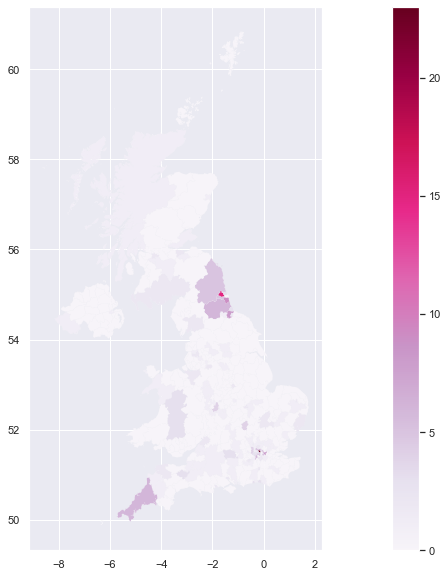

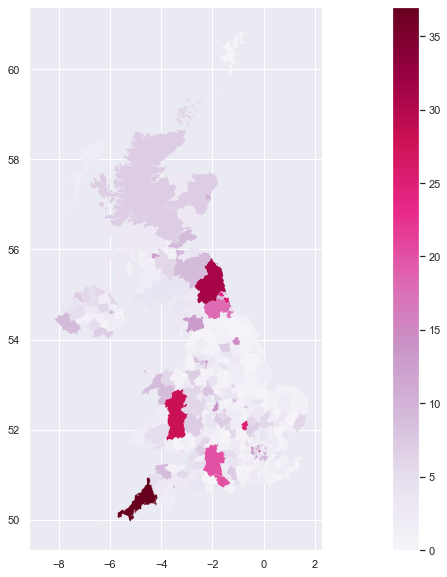

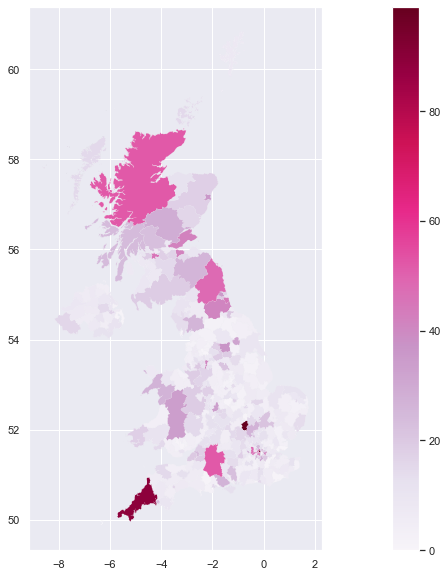

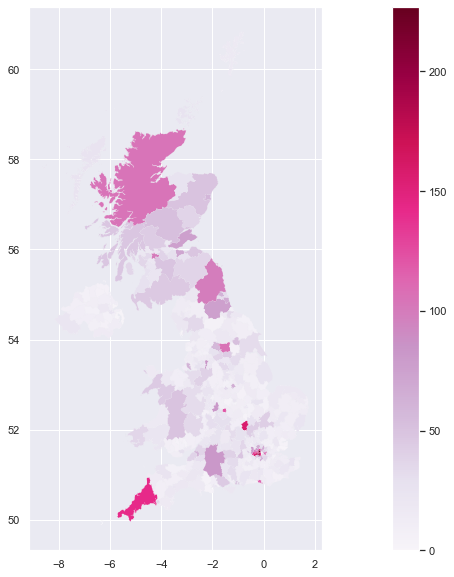

In [131]:
#plot the graph
#2011
fig, ax1 = plt.subplots(1, 1)

df.plot(column='Number_of_Chargers_2011', ax=ax1, 
        legend=True, cmap = 'PuRd',linewidth=0.05,
       )
#2014
fig, ax2 = plt.subplots(1, 1)

df.plot(column='Number_of_Chargers_2014', ax=ax2, 
        legend=True, cmap = 'PuRd',linewidth=0.05
       )
#2017
fig, ax3 = plt.subplots(1, 1)

df.plot(column='Number_of_Chargers_2017', ax=ax3, 
        legend=True, cmap = 'PuRd',linewidth=0.05
       )
#2020
fig, ax4 = plt.subplots(1, 1)

df.plot(column='Number_of_Chargers_2020', ax=ax4, 
        legend=True, cmap = 'PuRd',linewidth=0.05
       )
plt.show()

In [132]:
color_continuous_scale=[[0, 'rgb(240,240,240)'],
                      [10, 'rgb(13,136,198)'],
                      [15, 'rgb(191,247,202)'],
                      [25, 'rgb(4,145,32)'],
                      [30, 'rgb(227,26,28,0.5)']]